# Introduction à la Science des données



## Travail pratique 05 – Régression linéaire et clustering

### Table des matières

[Exercice 1: Analyse Exploratoire des Données](#Exercice-1:-Analyse-Exploratoire-des-Données)

- [1.1 Récupération des données](#1.1-Récupération-des-données)

- [1.2 Nettoyage des données](#1.2-Nettoyage-des-données)

- [1.3 Interprétation et analyse des graphiques](#1.3-Interprétation-et-analyse-des-graphiques)

[Exercice 2: Régression linéaire simple](#Exercice-2:-Régression-linéaire-simple)

[Exercice 3: Régression linéaire multiple](#Exercice-3:-Régression-linéaire-multiple)

[Exercice 4: Clustering](#Exercice-4:-Clustering)


---

**Informations de groupe:**

- Groupe: 14


- Nathan Füllemann
- Maxime Reggenass


---

**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing, Arthur Babey

**Contact**: prenom.nom@heig-vd.ch ou de préférence via Teams 

**Rendu**:

- Date: 15.01.2023, 23h55 (3 (+2) semaines)

- Travail par groupe de 2 ou 3. Il est impératif de vous enregistrer dans un groupe sur Cyberlearn. Une fois ceci fait, une seule personne du group a besoin de rendre le TP et le feedback est automatiquement envoyé à chaque membre du groupe. 


- Une fois complété, rendez directement le notebook nommé correctement comme suit "**TP5_ISD_SA2023_Nom1_Nom2(_Nom3).ipynb**" en remplaçant par vos noms de famille (pour ceux avec plusieurs noms de famille, vous pouvez mettre juste le premier et mettre les Prénoms et noms en entier ci-dessus.) Uploadez en suite votre fichier sur Cyberlearn dans la section prévue à cet effet. 


- Les questions sont généralement indiquées en **gras** ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 


- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre.


- Note: Ce TP est noté sur 6 

<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Effectuer une analyse exploratoire des données 
- À l'aide de l'algorithme vu en cours, réaliser une régression linéaire simple 
- À l'aide de la librairie scikit-learn, réaliser une régression linéaire multiple
- Utiliser K-means clustering
- Analyser et expliquer les résultats obtenus

<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>

<div class="alert alert-block alert-info">
<b>Points: </b> Le TP est noté sur 55 points (les exercices, 5 points pour le rendu, 2 points pour la propreté générale). En cas de retard, les pénalités varient selon la durée du retard, ou jusqu'à la non-correction du TP. 
</div>


In [1]:
# Importation des packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

# Différents moyens de standardiser les données mis à disposition par Scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

## Exercice 1: Analyse Exploratoire des Données

### 1.1 Récupération des données

Comme vous avez pu en voir au cours des précédents travaux pratiques, une certaine quantité de datasets publics sont régulièrement utilisés comme base d'apprentissage pour la science des données. Dans ce TP nous utiliserons le dataset connu sous le nom de "California Housing Dataset" qu'il est possible d'obtenir [ici via scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). Scikit-learn fournit une rapide analyse exploratoire qui a été copiée en partie ci-dessous. 

**Exécutez les cellules ci-dessous en lisant attentivement le code et les commentaires et répondez aux questions qui suivent.**

In [2]:
# On importe la fonction fetch_california_housing

from sklearn.datasets import fetch_california_housing

# Et on l'utilise. 
# l'option "as_frame" permet d'obtenir directement un DataFrame dans le dictionnaire.
# Sans cela, l'élément "frame" serait absent du dictionnaire ci-dessous.
# Les différents éléments du dictionnaire (Data, Target, DESCR, noms de colonnes, etc) sont dès lors directement accessible

california_housing = fetch_california_housing(as_frame=True) 

In [3]:
# Observez ce que contient la variable california_housing
california_housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [4]:
# Étant donné qu'il s'agit d'un dictionnaire, on peut regarder les clés et leur contenu (affiché ci-dessus)
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### Question

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Que contiennent les clés <i>'data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'</i> obtenues ci-dessus ? Donnez une rapide description des différents éléments sous forme de liste à puces. Une ligne par élément suffit.</p>
(5 points)





___
*Réponse:*
- **data** contient des attributs avec des données. Les attributs sont 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'
- **target** contient une seule colonne. Cette colonne est 'MedHouseVal'
- **frame** contient un tableau avec data et target mis ensemble
- **target_names** contient le nom de la colonne dans target, qui est aussi la dernière colonne dans frame
- **feature_names** contient les noms des attributs dans data, qui sont aussi toutes les colonnes dans frame à part la dernière
- **DESCR** contient une description du dataset, avec notamment des informations sur les attributs, des références et un texte de description
___

En utilisant print(), on peut afficher de manière plus lisible l'élément "DESCR" du dictionnaire. 

*(car **print()** va interpréter les caractères spéciaux comme '\n' -> retour à la ligne)*

In [5]:
print(california_housing["DESCR"])

# Aussi accessible en utilisant cette notation: 
#print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

En accédant à l'élément *frame*, on peut commencer à travailler comme d'habitude. 

Observons rapidement nos données:

In [6]:
# Les 5 premières observations
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C'est un peu long à écrire "california_housing.frame". Affectons ça à notre variable "df" habituelle, ou plutôt "df_raw" car nous allons encore un peu le modifier (preprocessing) avant d'en avoir une version finale. **Attention, petit rappel: si vous exécutez une autre affectation à une variable "df" dans un autre notebook qui tourne avec le même kernel, il faudra réafecter la variable ici. Vous pouvez à tout moment exécuter "cell > run All" pour tout réexécuter. Suivant le contenu cela peut prendre du temps par contre !**

In [7]:
# Données brutes
df_raw = california_housing.frame

In [8]:
df_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


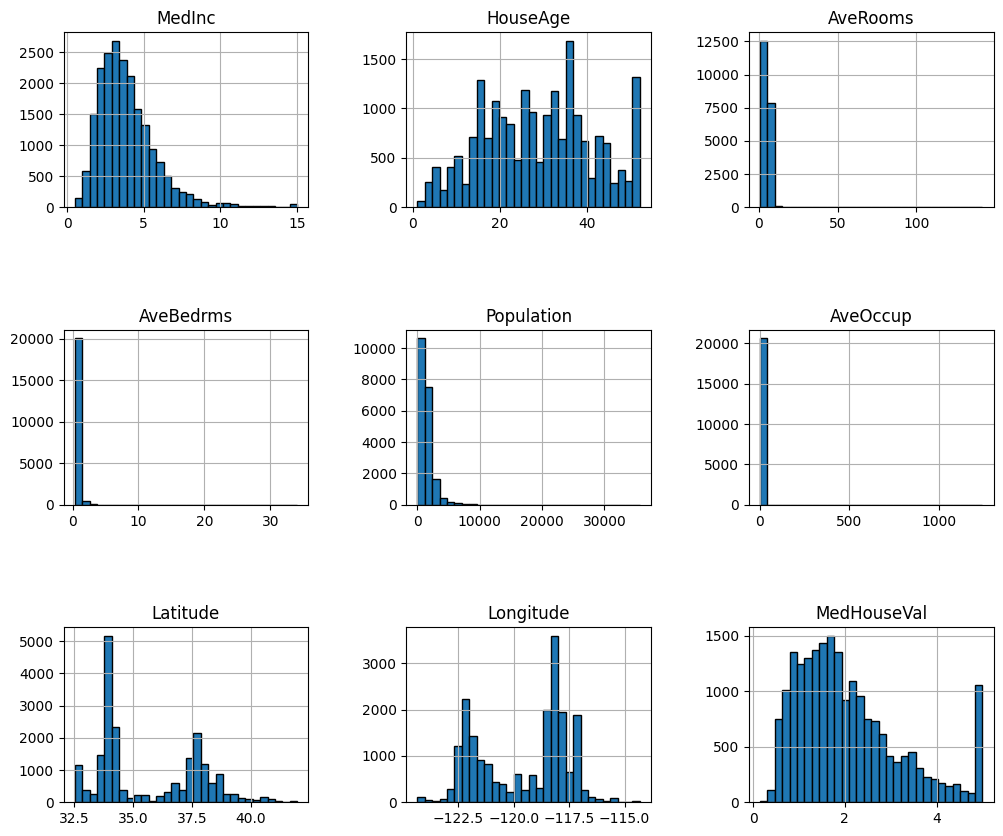

In [9]:
# Histogrammes des variables
df_raw.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

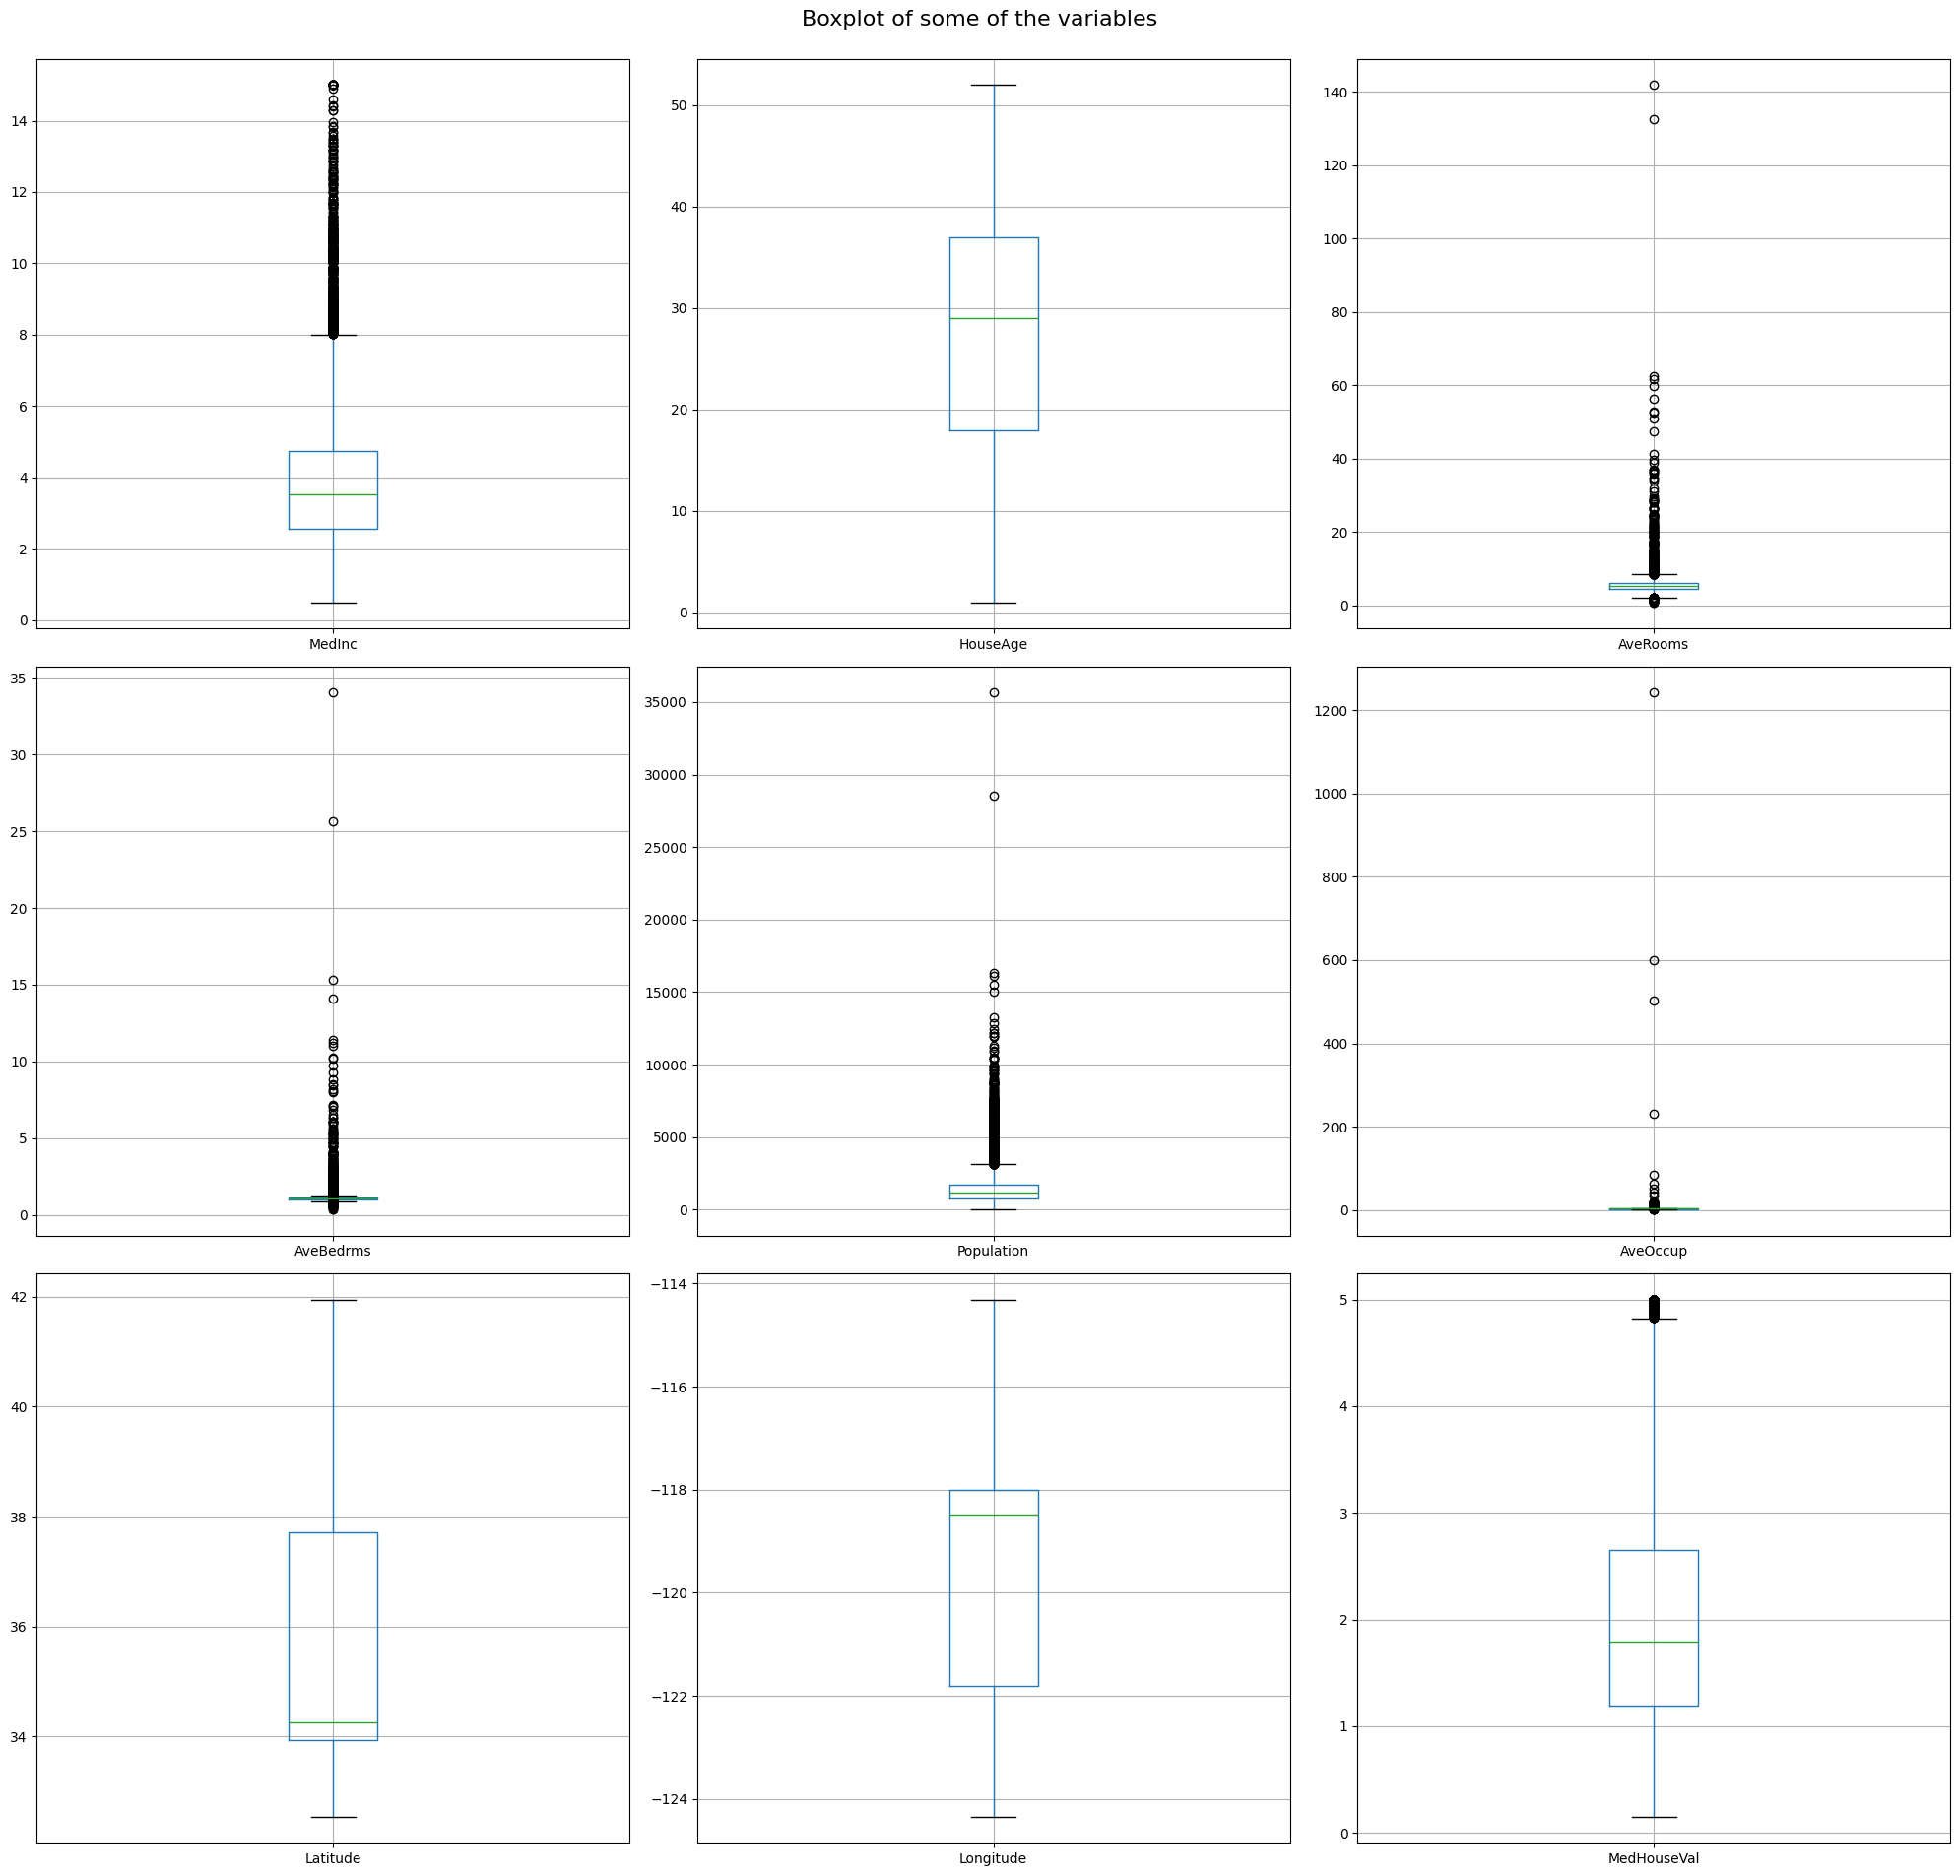

In [10]:
# Boxplot des variables

variables = df_raw.columns

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(variables):
    df_raw.boxplot(col, ax=axs[i])
    
fig.suptitle('Boxplot of some of the variables', fontsize=16)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

Détails des features avec valeurs abérrantes

In [11]:
features_of_interest = ["AveRooms", "AveOccup", "Population"] 
california_housing.frame[features_of_interest].describe()

,AveRooms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000
mean,5.429000,3.070655,1425.476744
std,2.474173,10.386050,1132.462122
min,0.846154,0.692308,3.000000
25%,4.440716,2.429741,787.000000
50%,5.229129,2.818116,1166.000000
75%,6.052381,3.282261,1725.000000
max,141.909091,1243.333333,35682.000000


### Questions

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Observez les graphiques ci-dessus. Que pouvez vous dire sur les valeurs extrêmes des variables "AveRooms", "Population" et "AveOccup" ? Qu'est-ce qu'un "block group" ?</p>

<p style="background-color:#AFEEEE;padding:3px">Note: Aidez-vous de la description des données obtenue plus haut. Ne décrivez pas simplement les graphiques: donnez une explication. </p>

___
*Réponse:*
- **AveRooms** Vu que AveRooms correspond au nombre de pièces par maison les valeurs extrèmes sont du a des moments ou il y a des "chateaux" immense maison qui ont énormément de pièces ou certain immeuble d'entreprise si il sont compté comme une seul maison 

- **Population**
Des valeurs extrêmes pourraient suggérer des groupes de pâtés de maisons avec une population très élevée ou très basse par rapport à la norme.Comme par exemple si il y a des zones rurale ou des immenses immeubles regroupant enormément de personne
- **AveOccup**
Des valeurs extrêmes pourraient indiquer des situations où le nombre moyen de membres par ménage est significativement différent de la norme.

Un "block group" est la plus petite unité géographique qui représente typiquement une population de 600 à 3'000 personnes.

___

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.1: </b> Points obtenus: /8
</div>

Remarques: 

### 1.2 Nettoyage des données

Pour avoir un meilleur aperçu des données, nous allons supprimer quelques observations extrêmes. Pour prédire le prix d'une maison à partir de données régionales, nous pouvons exclure les éléments sortants de l'ordinaire. Si vous le souhaitez, vous pouvez réafficher différents graphiques pour voir vos nouvelles données.

In [12]:
initial_size = df_raw.shape[0]

df = df_raw[(df_raw["AveRooms"] < 10) & (df_raw["Population"] < 20000)]

# Sauvegarder la taille du DataFrame après la suppression
new_size = df.shape[0]

# Calculer le nombre de lignes supprimées
rows_removed = initial_size - new_size
print(f"Nombre de lignes supprimées : {rows_removed}")

Nombre de lignes supprimées : 229


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Combien de lignes ont été supprimées ? </p>


(2 point)

___
*Réponse:*229
___

### 1.3 Ho non ! Le code ci-dessous affiche un magnifique graphique mais on ne comprends rien au code !



Complétez les commentaires "# -" du code ci-dessous pour que votre assistant puisse enfin comprendre le code qu'il a copié sur [scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).  Aidez-vous de la documentation si nécessaire mais gardez les descriptions simples. Quelques mots suffisent, pas besoin de grande phrases.

(10 points)

In [13]:
# -
rng = np.random.RandomState(0)

# -
indices = rng.choice(np.arange(df.shape[0]), 
                     size=10000,
                     replace=False)

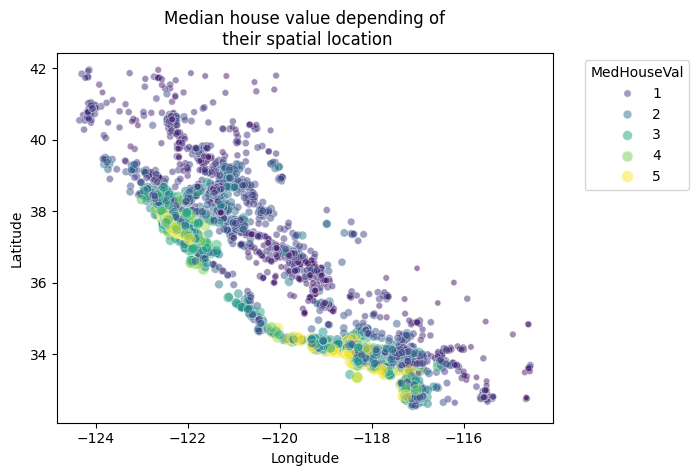

In [14]:
# -
sns.scatterplot(
data=df.iloc[indices],                         # Sélectionne les lignes de "df" aux indices spécifiés
x="Longitude", y="Latitude",                   # Colonnes de "data" utilisées pour les axes x et y
size="MedHouseVal",                            # Taille des points basée sur la colonne "MedHouseVal"
hue="MedHouseVal",                             # Couleur des points basée sur la colonne "MedHouseVal"
palette="viridis",                             # Palette de couleurs utilisée pour la visualisation
alpha=0.5)                                     # Transparence des points dans le graphique


# -
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Si vous n'êtes pas familier avec la Californie, allez jeter un coup d'oeil sur Google maps. Que pouvez-vous observer concernant le prix median des maisons ?</p>

(2 points)

___
*Réponse:*Les maisons les plus chères correspondent aux maisons sur la côte, près de l'océan.
___

On crée maintenant un joli pairplot à l'aide de Seaborn:

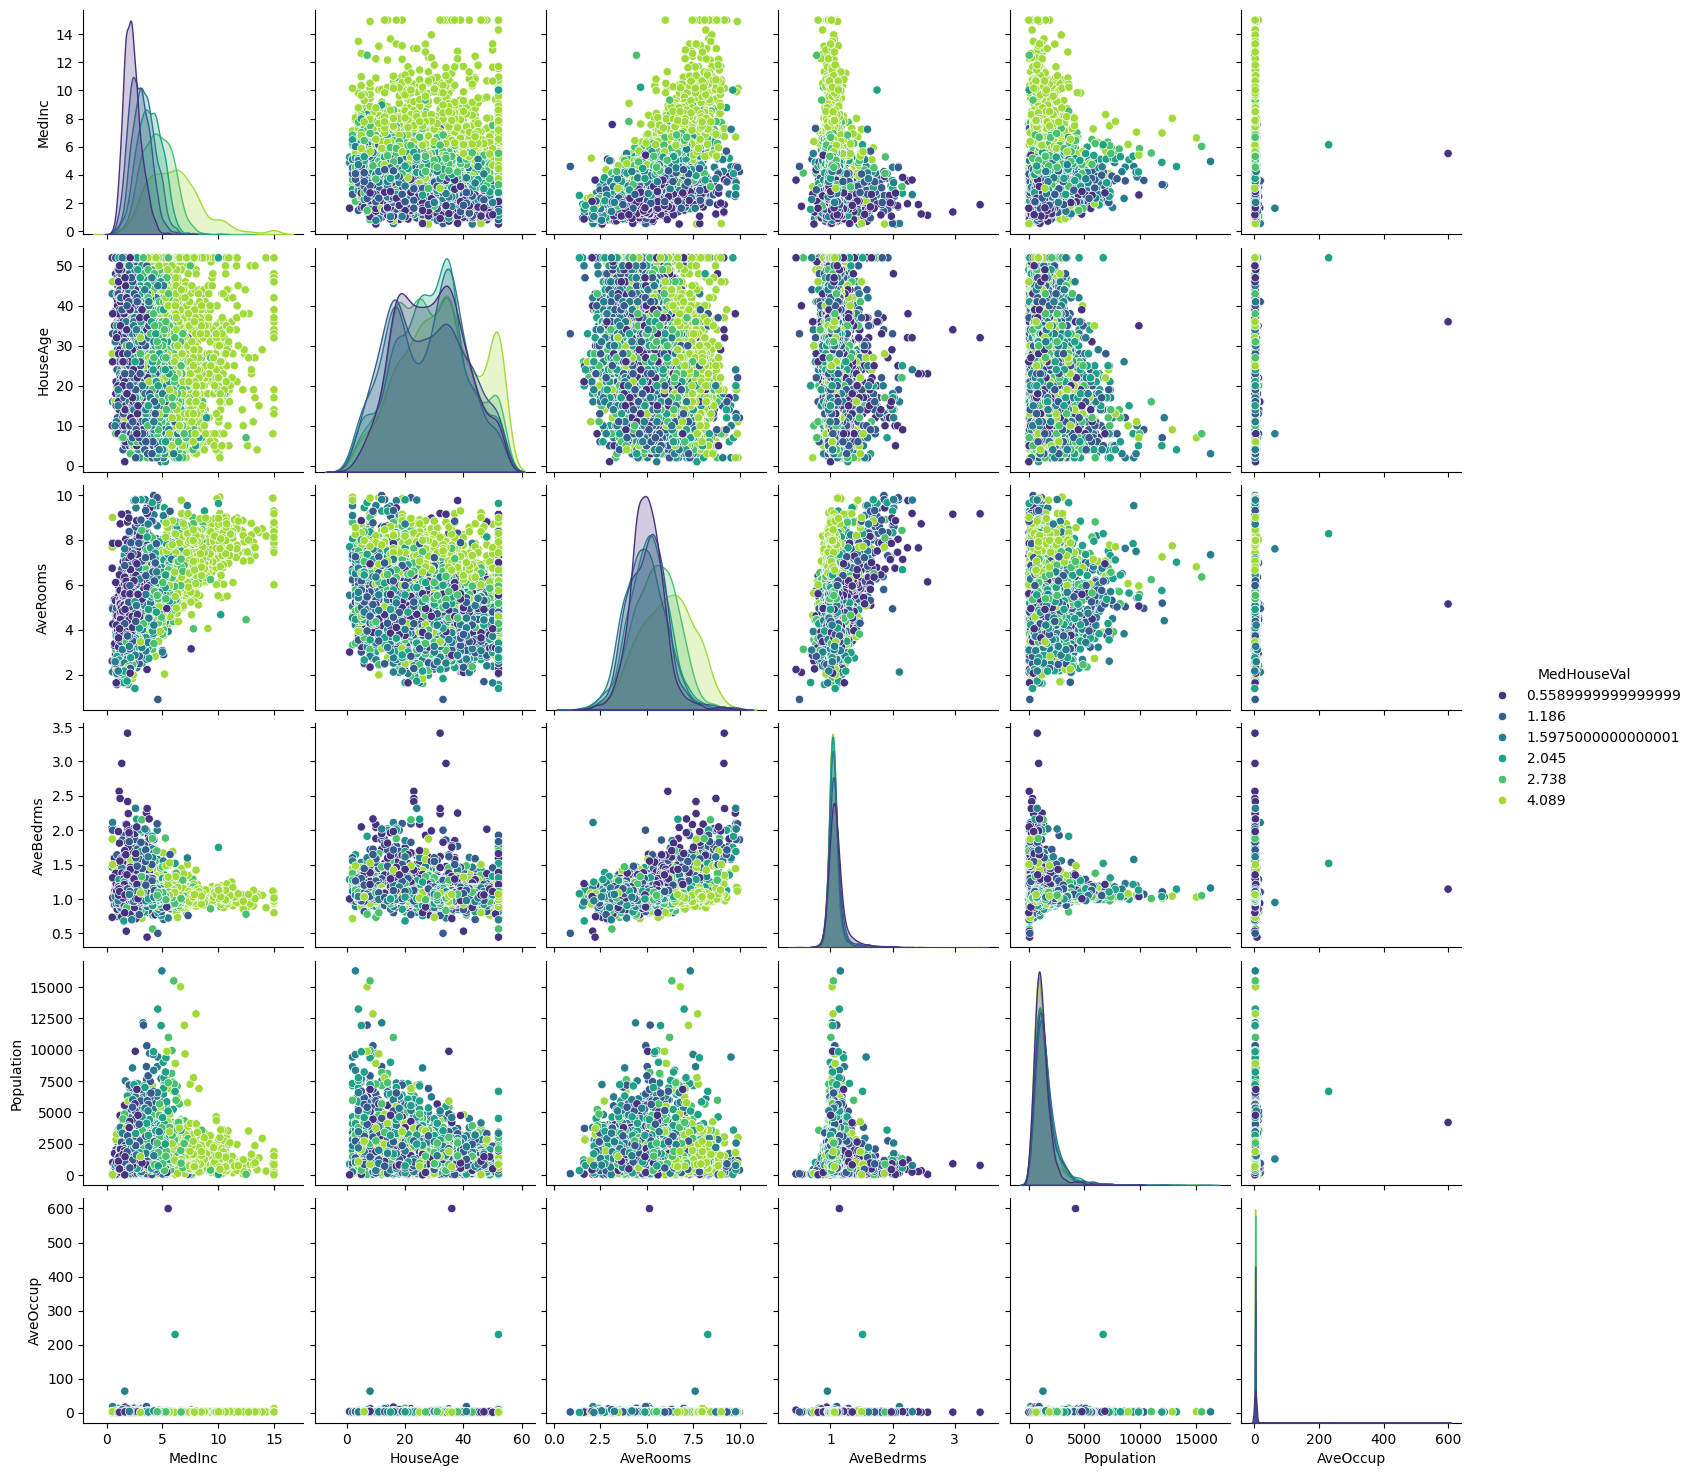

In [15]:
# Inutile de garder ces deux colonnes
columns_drop = ["Longitude", "Latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)

# Ignorez ce petit passage un peu complexe, c'est pour avoir 6 couleurs pour une variable continue. 
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

### 1.4 Interprétation et analyse des graphiques

Dans la partie suivante, nous essayerons de prédire la variable MedHouseVal en fonction des autres variables, une à une. Observez les différents graphiques réalisés dans cette analyse exploratoire. 

(6 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quelles variables pourraient être, à elles seules, de bons prédicteurs ? Ou de mauvais ? Ajouteriez-vous un ou plusieurs autre graphiques pour visualiser les données ? Justifiez vos réponses.</p>

___
*Réponse:* 
Variables potentiellement bonnes prédicteurs :

MedInc (Revenu médian dans le groupe de pâtés de maisons) : Une corrélation positive avec MedHouseVal pourrait suggérer que les quartiers avec des revenus plus élevés ont tendance à avoir des maisons de valeur plus élevée.
AveRooms (Nombre moyen de pièces par ménage) : Un nombre élevé de pièces par ménage pourrait indiquer des maisons spacieuses, ce qui pourrait être associé à des valeurs de maison plus élevées.


Variables potentiellement moins bonnes prédicteurs :

Latitude et Longitude : Ces variables pourraient ne pas être des prédicteurs forts par elles-mêmes, à moins qu'elles ne soient utilisées dans des analyses spatiales plus complexes.


Autres graphiques suggérés pour une analyse plus approfondie :

Matrices de corrélation : Pour quantifier les relations linéaires entre les variables.

___

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.2-1.3: </b> Points obtenus: /20
</div>

Remarques: 

## Exercice 2: Régression linéaire simple

<div class="alert alert-block alert-warning">
<b>Attention: </b> la régression linéaire dans cet exercice peut prendre environ 5 minutes avec les hyper-paramètres actuels. 
</div>

Maintenant que vous êtes familiarisés avec la base de données, vous allez utiliser l'algorithme de régression linéaire simple vu en classe. 

Si vous voulez revoir comment fonctionne la régression linéaire d'une manière plus vidéastique, je vous conseille [cette vidéo de StatQuest](https://www.youtube.com/watch?v=nk2CQITm_eo) qui revoit étape par étape le fonctionnement de la régression simple et de l'ajustement d'une ligne aux données, de $ R^2 $ et de la régression multiple (en Anglais simple et clair mais quand même en 25 minutes, les premières 10 minutes suffisent). [Cette vidéo](https://www.youtube.com/watch?v=PaFPbb66DxQ) vous résume en moins de temps le concept qui va être utilisé dans le code ci-dessous: comment ajuster une ligne aux données. 






### 2.1 Complétez les commentaires

(6 points)

**Les troix méthodes ci-dessous: "*compute_MSE*", "*step_gradient*" et "*gradient_descent*" n'ont pas de commentaire d'entête.** Complétez les en indiquant ce que fait la fonction et pourquoi, ce que l'on a comme paramètres et ce qu'elle retourne. Vous pouvez vous inspirer des commentaires des fonctions d'après pour le format. 

___

*Répondre directement dans le code ci-après, entre les guillemets:*

In [16]:
def compute_MSE(b,m,data):
    """
    calcule l'erreur quadratique moyenne.
    Paramètres
    ----------
    b : float
        constante de la droite des valeurs estimées
    m : float
        pente de la droite des valeurs estimées
    data : dataFrame 
        dataset d'où viennent les données
    Retourne
    -------
    float
        la somme des écarts au carré entre les valeurs réelles et estimées, divisé par le nombre de valeurs
     
    """
    totalError = 0
    # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    """
    
    Paramètres
    ----------
    b_current : float
        constante actuelle de la droite des valeurs estimées
    m_current : float
        pente actuelle de la droite des valeurs estimées
    data : dataFrame 
        le dataset d'où viennent les données
    learning_rate : 
        rythme d'apprentissage des valeurs estimées
    Retourne
    -------
    
        new_b = constante de la droite après passage dans l'algorithme,
        new_m = pente de la droite après passage dans l'algorithme
    """
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    """
    calcule la descente de gradient.
    Paramètres
    ----------
    data : dataFrame
        le dataset d'où viennent les données
    starting_b : float
        constante de la droite des valeurs estimées
    starting_m : float
        pente de la droite des valeurs estimées
    learning_rate : float
        rythme d'apprentissage des valeurs estimées
    num_epochs : float
        nombre de passages dans l'algorithme
    Retourne
    -------
        float
        b = constante de la droite après descente de gradient,
        m = pente de la droite après descente de gradient
    """
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b,m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b,m]

### 2.2 Pearson

(5 points)

Pour calculer le score $R^2$ on peut utiliser la fonction *r2_score()* fourni par scikit-learn ou l'écrire nous-même. Pour la beauté du geste, et quelques points bien sûr, **complétez la fonction ci-dessous pour calculer le coefficient $R^2$ (aussi appelé coefficient de détermination de Pearson, à ne pas confondre avec le coefficient de corrélation linéaire de Bravais-Pearson, souvent appelé Person Correlation en Anglais, que nous appelons simplement "corrélation" ici. ).** 

Pour être certain que votre code fonctionne, vous pouvez exécuter la cellule de TEST qui comparera les résultats de votre méthode avec ceux de la méthode préfaite de sklearn. 



In [17]:
def pearson(y, y_pred):
    """
    calcule le coefficient de détermination linéaire de pearson.
    Paramètres
    ----------
    y : array
        valeurs réelles
    y_pred : array
        valeurs prédites
        
    Retourne
    -------
    float
        le coefficient de corrélation (la somme des erreurs quadratiques divisé par
        la somme des différences entre les valeurs réelles et la moyenne des valeurs réelles)
    """
    # - Complétez le code et le commentaire d'entête pour calculer le coefficient de Pearson ici. - 
    # - (n'oubliez pas de changer la valeur de retour !)
    num = 0
    det = 0
    mean = 0
    
    for i in range (0, len(y)):
        mean += y[i]
    
    mean = np.mean(y)
    
    for i in range (0, len(y)):
        num += (y[i] - y_pred[i]) ** 2
        det += (y[i] - mean) ** 2
        
    pearson = 1 - num/det
    
    return pearson

In [18]:
# SOLUTION
def pearson(y, y_pred):
    y_mean = np.mean(y)
    sum_n = 0
    sum_d = 0
    for i in range(len(y)):
        sum_n += (y[i] - y_pred[i]) ** 2
        sum_d += (y[i] - y_mean) ** 2
    return 1 - sum_n / sum_d

**Test**

Comparaison entre votre fonction et celle de scikit-learn. 

In [19]:
# TEST - Affiche un message en cas de réussite / échec de la méthode "pearson()"
import random
random.seed(0)

y = np.random.randint(20, size=10)
y_pred = np.random.randint(20, size=10)

if (round(pearson(y, y_pred), 3) == round(r2_score(y, y_pred), 3)): 
    print(f"RÉUSSITE - La fonction pearson() donne le résultat attendu.")
else:
    print(f"ÉCHEC - Il semble qu'il y ait une erreur et que votre fonction ne donne pas les bons résultats.")

RÉUSSITE - La fonction pearson() donne le résultat attendu.


<div class="alert alert-block alert-info">
<b>Corrections 2.1 - 2.2: </b> Points obtenus: /11
</div>

Remarques: 

### 2.3 Exécution du code vu en cours

Le code ci-dessous est simplement un joli packaging  du code vu en cours. 

In [20]:


def score_simple_linear_regression(df: pd.DataFrame, var: str, lr: float, n_epochs: int, label: str = 'MedHouseVal', n_repetitions: int = 100) -> tuple:
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the California dataset.
    var : str
        Variable to use as feature.
    label : str, default 'MedHouseVal'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
        
    Returns
    -------
    Tuple
        (Mean score, list of labels, list of predictions, best m, best b)
    """
    scores = []
    labels = []
    predictions = []
    
    data = df[[var, label]].values
    
    ms = []
    bs = []
    
    for _ in range(n_repetitions):
        train, test = train_test_split(data, test_size=0.2)
        # Initialize m and b.
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        # Step 4: gradient descent
        [b, m] = gradient_descent(train, initial_b, initial_m, lr, n_epochs)
        preds = test[:, 0] * m + b
        lbls = [test[i, 1] for i in range(len(test))]
        ms.append(m)
        bs.append(b)
        
        # Inversez le commentaire ci-dessous pour utiliser la méthode de sklearn.
        #scores.append(r2_score(lbls, preds))
        scores.append(pearson(lbls, preds))
        
        labels += lbls
        predictions += list(preds)
    
    best_idx = scores.index(max(scores))
    
    return np.mean(scores), labels, predictions, ms[best_idx], bs[best_idx]

def plot_regression_line(data: np.ndarray, x_name: str, y_name: str, m: float, b: float, title: str) -> plt.axes:
    """
    Plot the regression line usimg the given `m` and `b`.
    
    Parameters
    ----------
    data : np.ndarray
        Data with the variable and the label to plot. 
        Label must be in the last column.
    x_name : str
        Name of the column for x.
    y_name : str
        Name of the column for y.
    m : float
        m value to use for the predictions.
    b : float
        b value to use for the predictions.
    title : str
        Title of the plot.
        
    Returns
    -------
    plt.axes
        Matplotlib ax. 
    """
    fig, ax = plt.subplots(figsize=(15, 9))
    data.plot.scatter(x=x_name, y=y_name, ax=ax, title=title)
    y_pred = m * data[x_name] + b
    ax.plot(data[x_name].values, y_pred, 'r')
    ax.text(0.025, 0.925,
            f'$R^2={np.round(r2_score(data[y_name].values, y_pred), 3)}$',
            fontsize=12, transform=ax.transAxes)
    return ax

Si vous n'avez pas réussi à écrire une fonction **pearson()**, (de)commentez les lignes indiquées dans la fonction "*score_simple_linear_regression()*" ci-dessus afin d'utiliser la méthode de sklearn. 


Comme vu dans le labo précédent, il vaut souvent mieux normaliser/standardiser les données (moyenne nulle et écart-type à 1). Ça n'est pas toujours le cas et ça peut être discutable. Ici nous allons normaliser les variables indépendantes que nous voulons utiliser pour la régression linéaire simple. 

*Tip: n'oubliez pas que vous pouvez développer ou réduire la sortie de l'exécution d'une cellule en cliquant sur la gauche de la cellule. Comme la sortie de la cellule suivante est relativement longue, la réduire pour ne pas scroller pendant trop longtemps peut être utile!*


Variables testées pour la régression linéaire simple: ['MedInc', 'AveRooms', 'Population']
Variable MedInc
Learning rate: 0.5


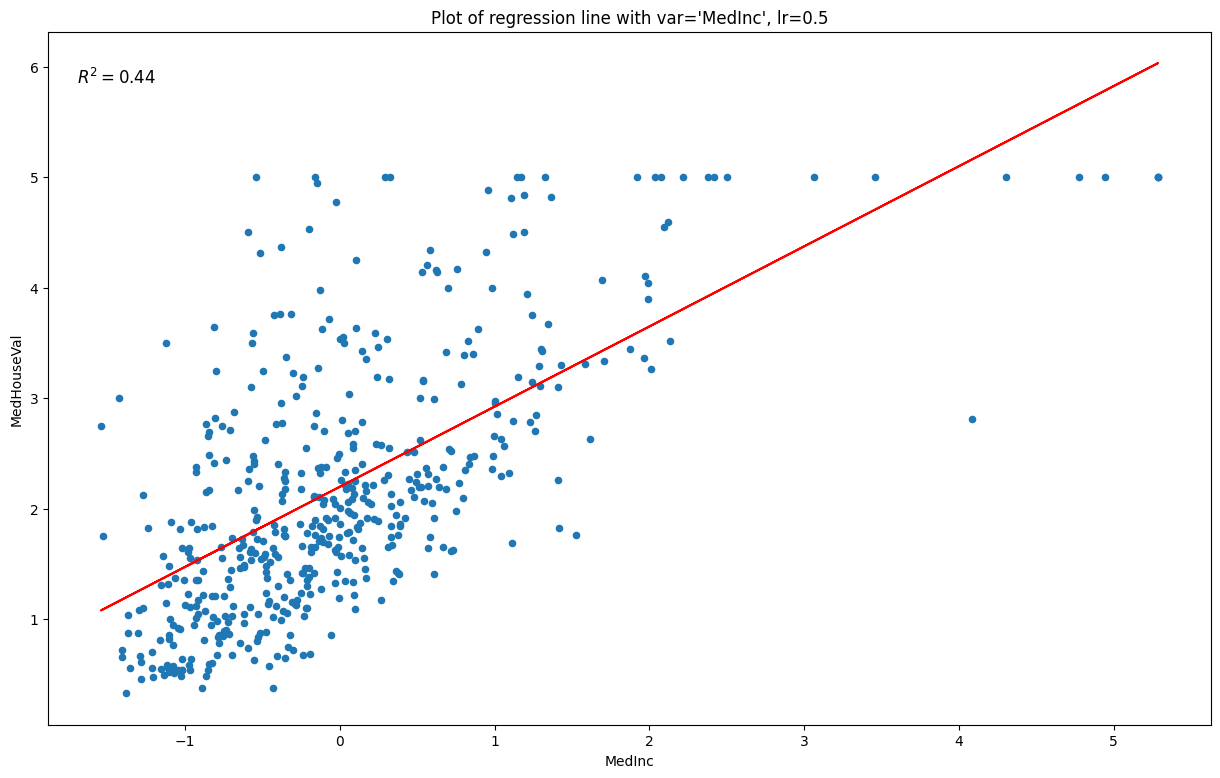

Learning rate: 0.1


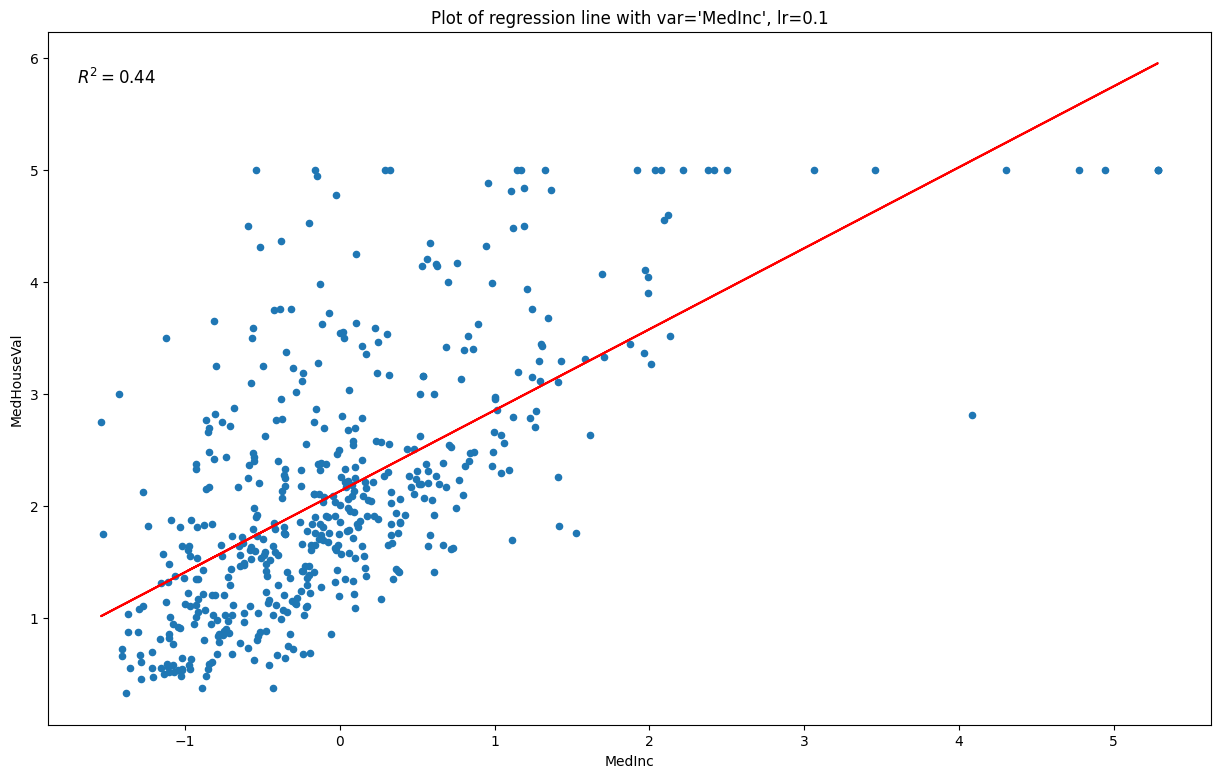

Learning rate: 0.01


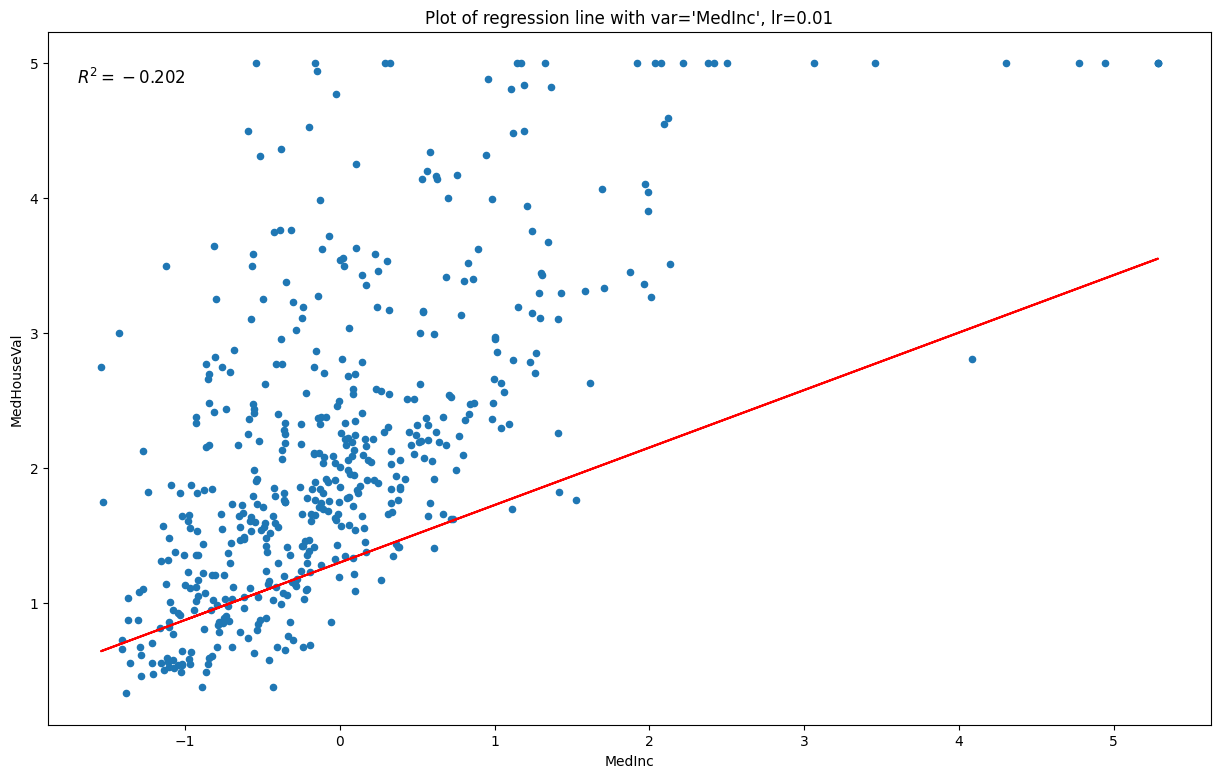

Learning rate: 0.001


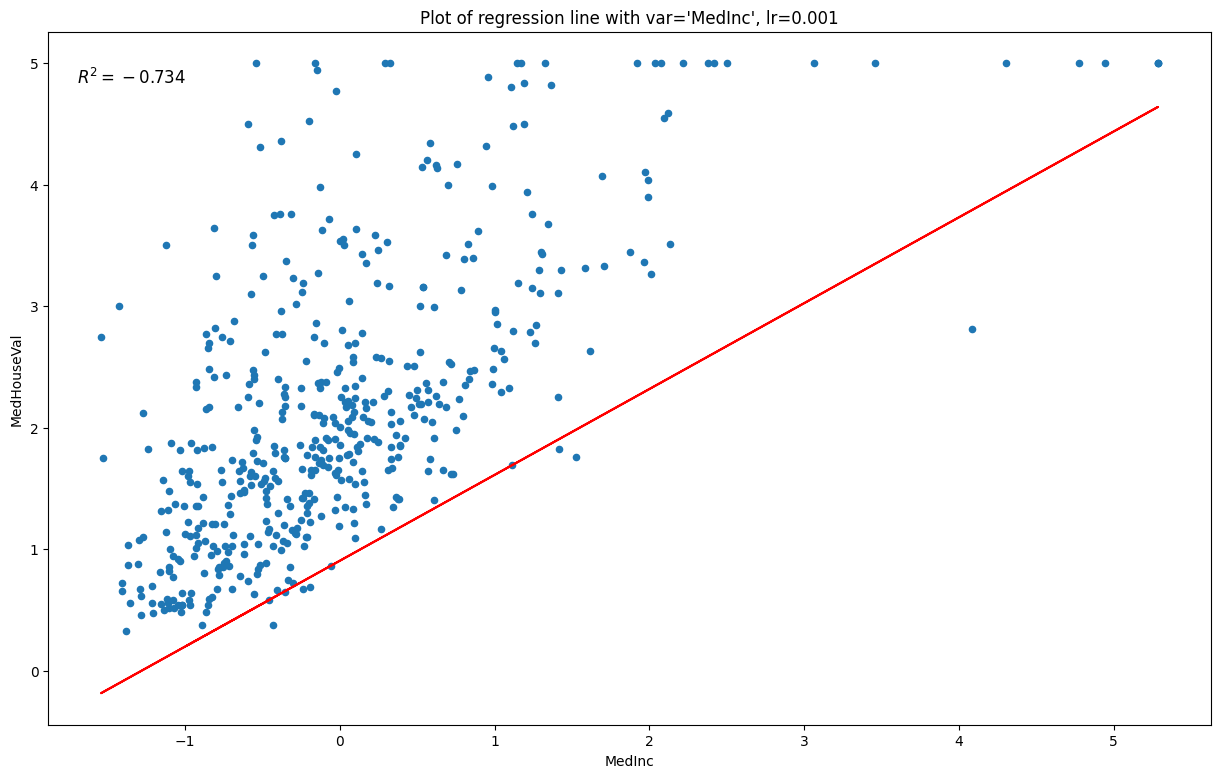

Variable AveRooms
Learning rate: 0.5


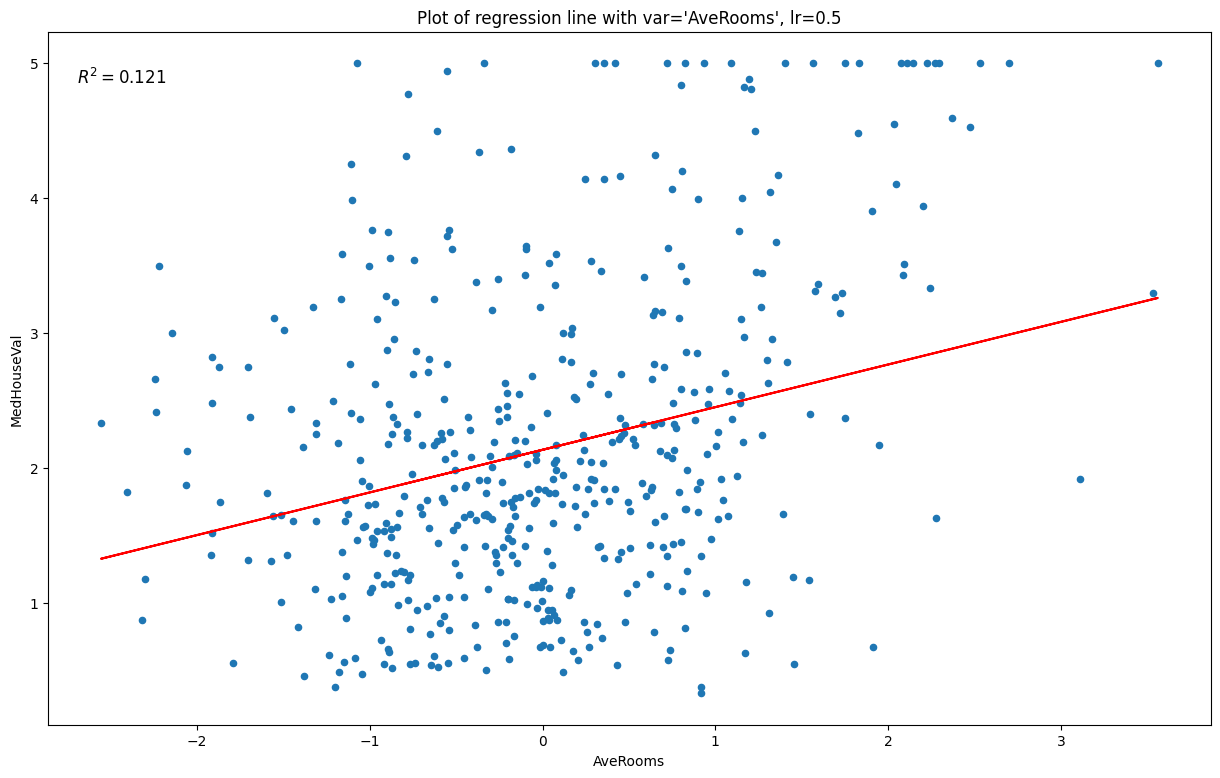

Learning rate: 0.1


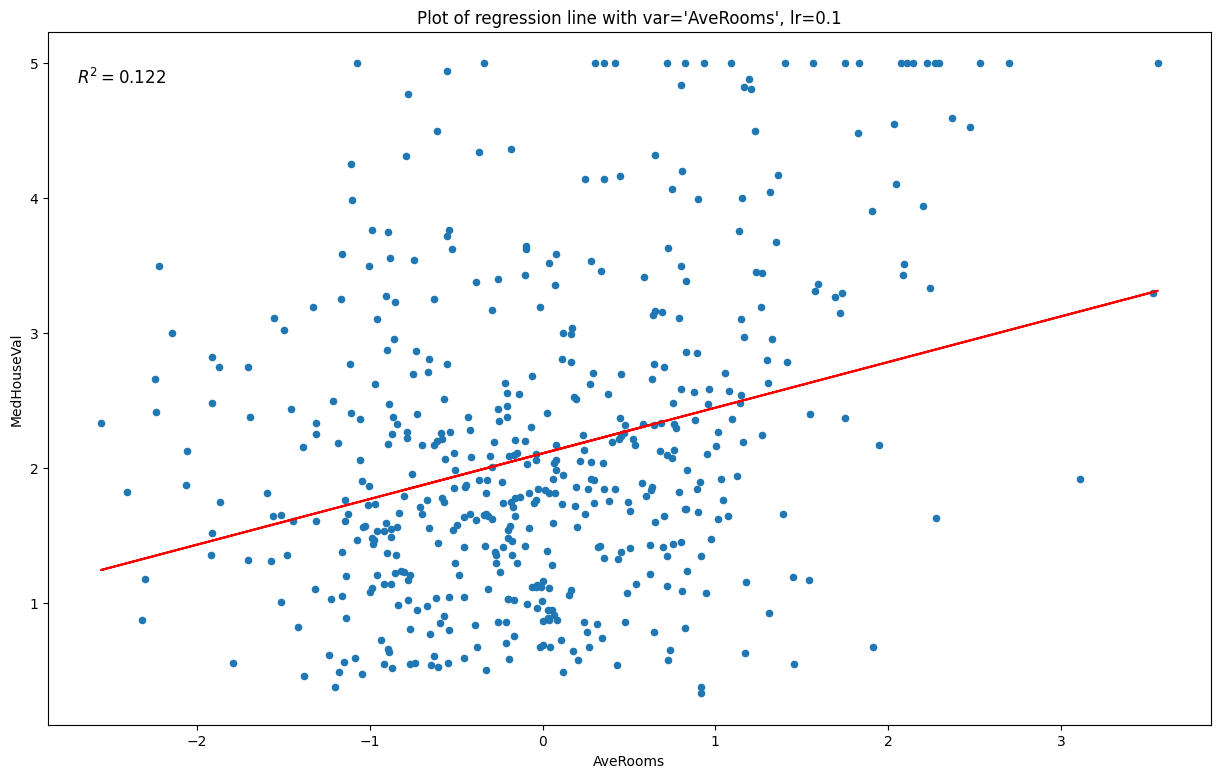

Learning rate: 0.01


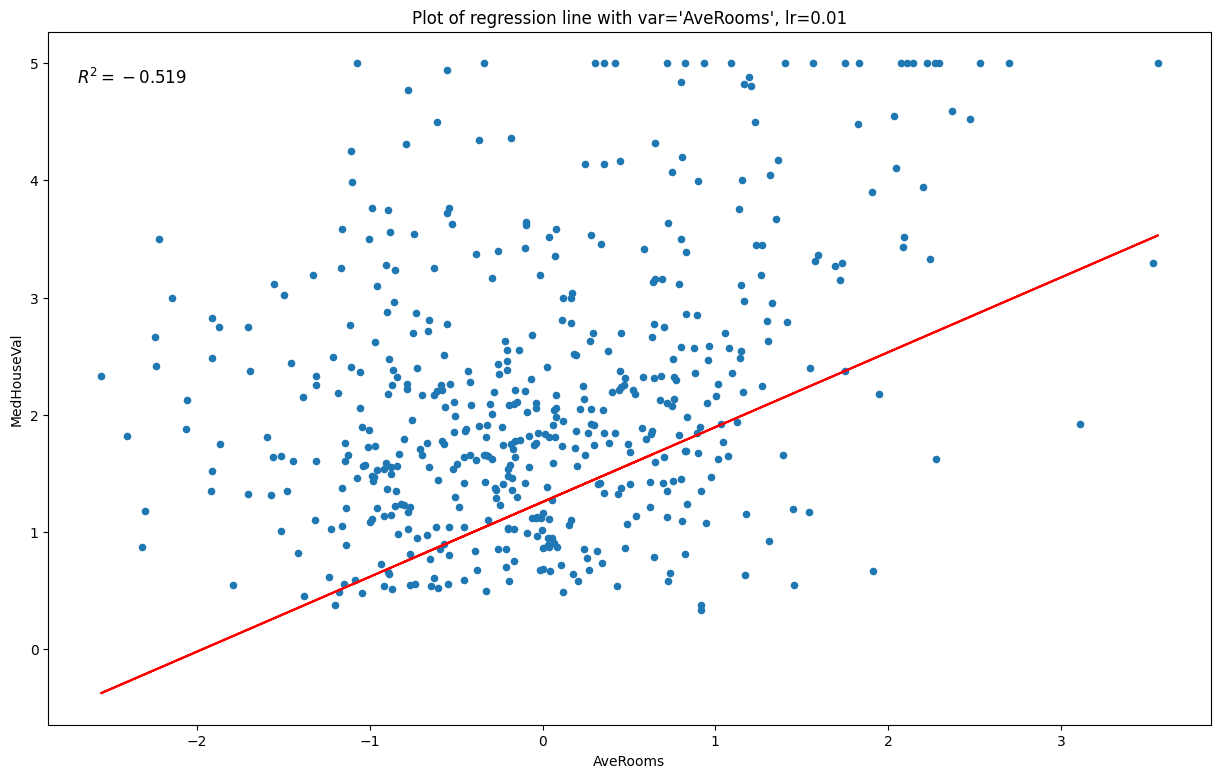

Learning rate: 0.001


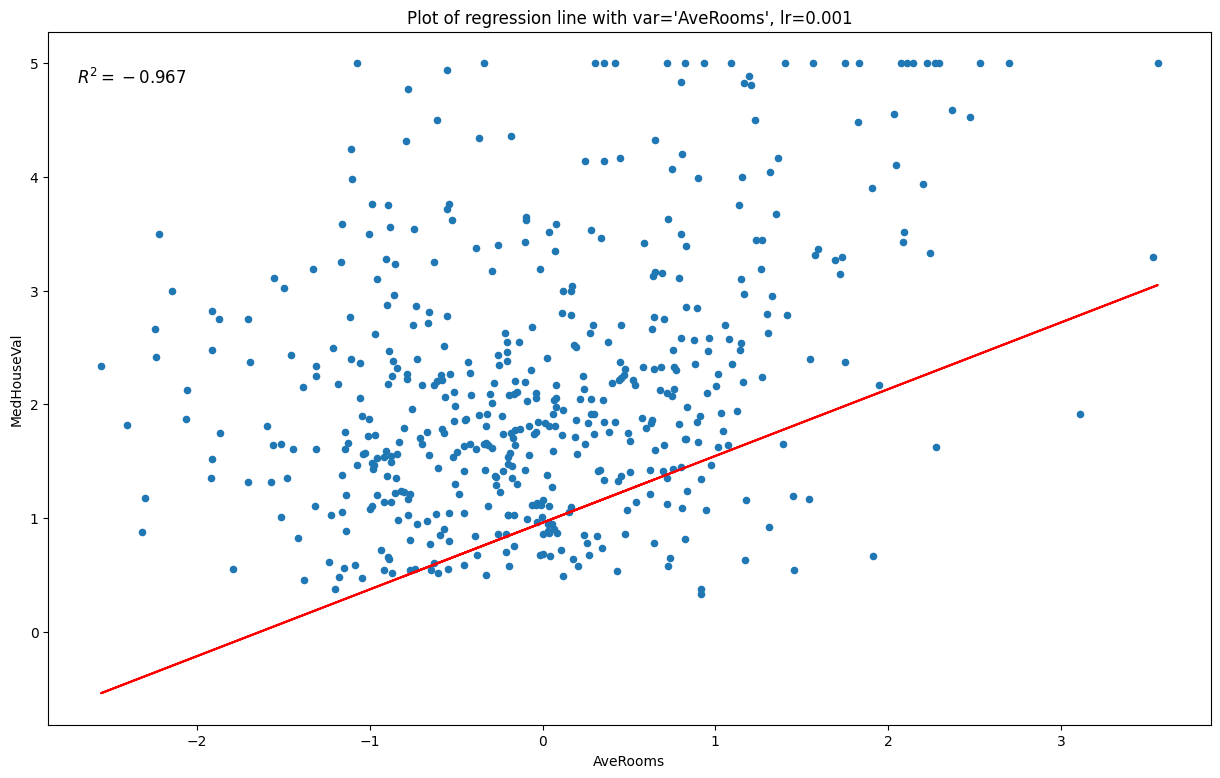

Variable Population
Learning rate: 0.5


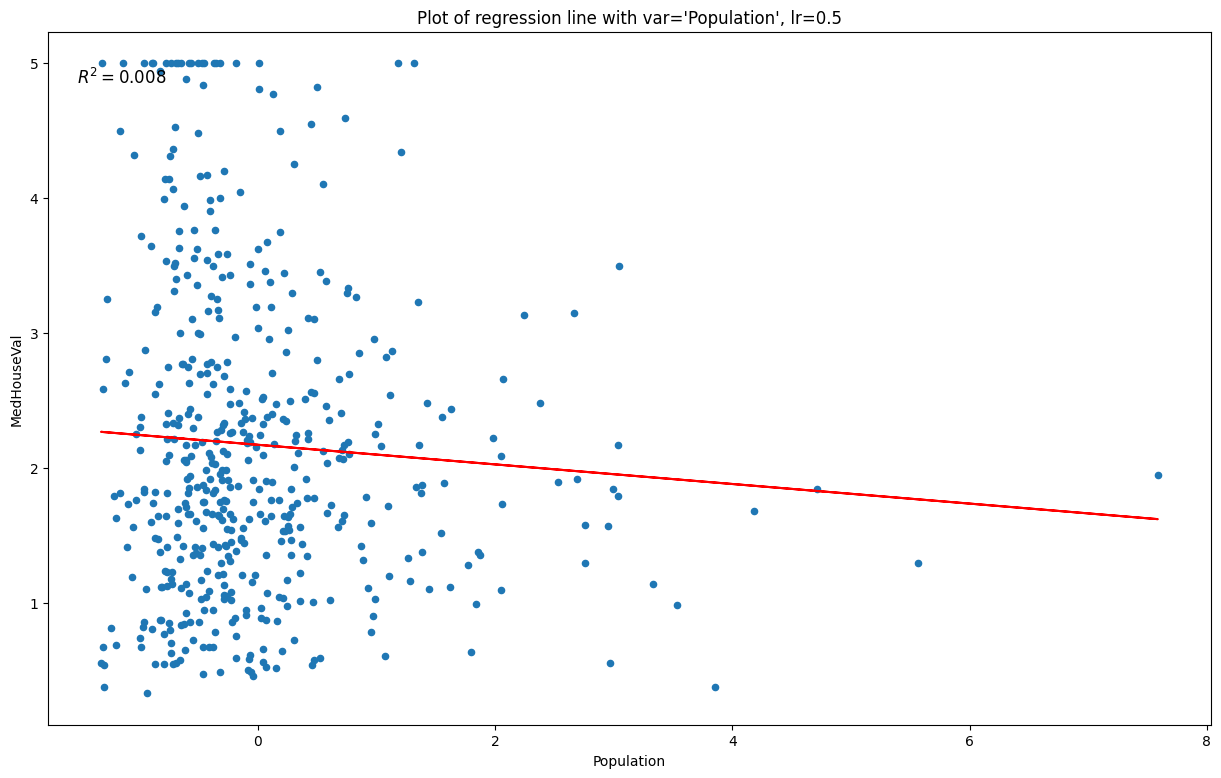

Learning rate: 0.1


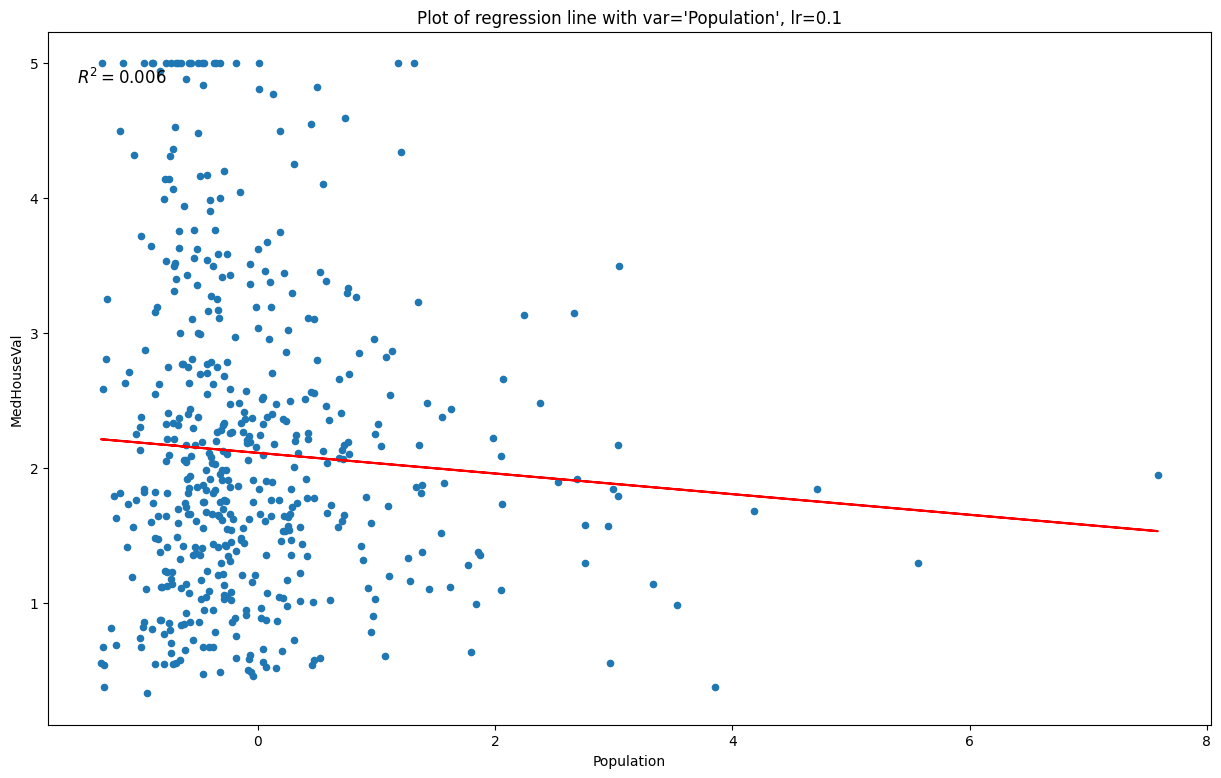

Learning rate: 0.01


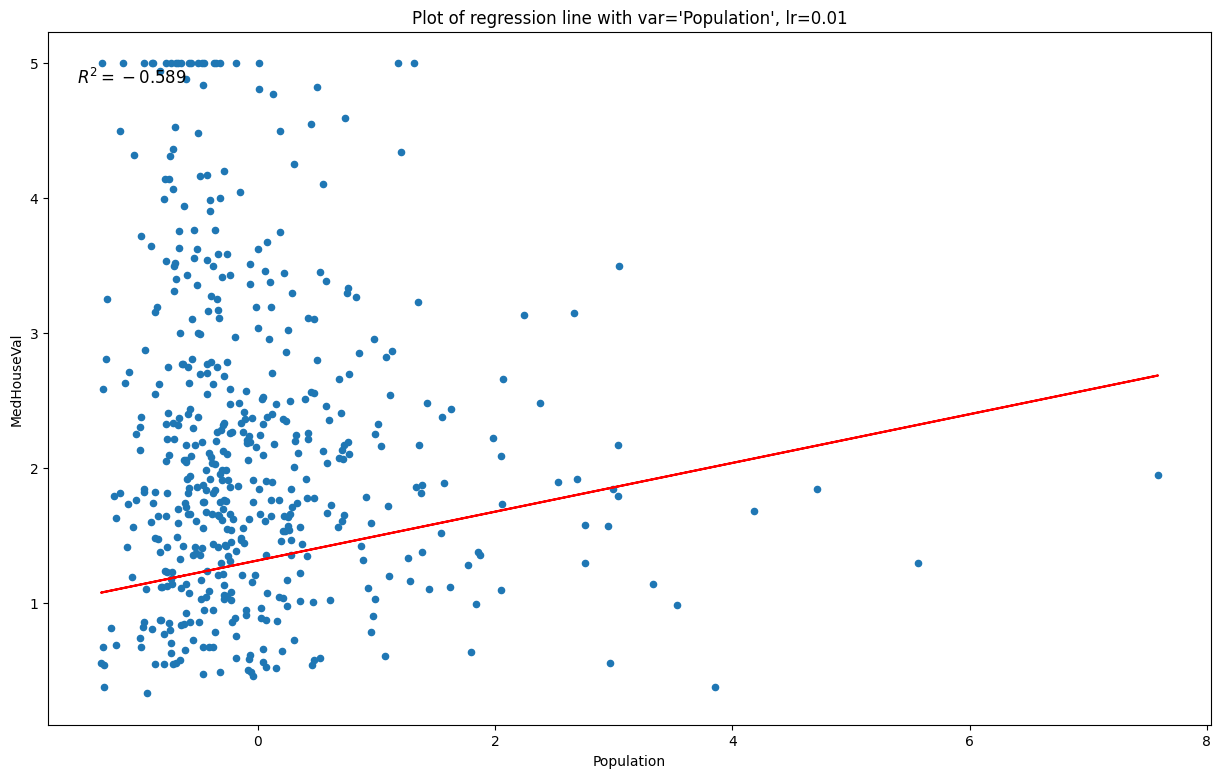

Learning rate: 0.001


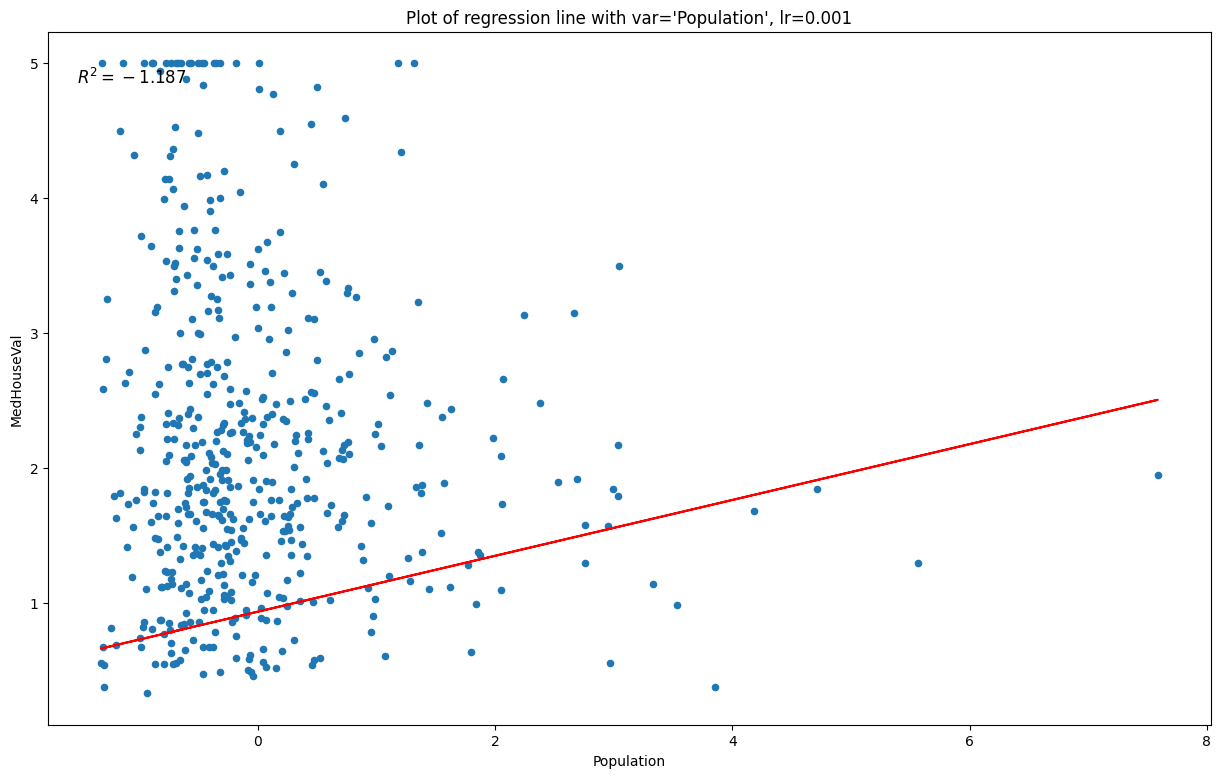

Exécution: 66.69959211349487 secondes
Variable MedInc
Learning rate: 0.5, Score: 0.4292490209205997
Learning rate: 0.1, Score: 0.4207089525466556
Learning rate: 0.01, Score: -0.8477131044075521
Learning rate: 0.001, Score: -1.623480304714862
Variable AveRooms
Learning rate: 0.5, Score: 0.11469189172768267
Learning rate: 0.1, Score: 0.09556324799499583
Learning rate: 0.01, Score: -1.1411176433661543
Learning rate: 0.001, Score: -1.9458459818211216
Variable Population
Learning rate: 0.5, Score: -0.0076275125785949536
Learning rate: 0.1, Score: -0.012347266977667888
Learning rate: 0.01, Score: -1.262715384122513
Learning rate: 0.001, Score: -2.5073295271577303


In [21]:
import time

# Mesure du temps au début
start = time.time()


# On va prendre un subset du dataframe, avec sa taille on en aurait pour 1h de calcul à chaque fois.
indices = rng.choice(np.arange(df.shape[0]), 
                     size=500,
                     replace=False)
subset_df = df.iloc[indices]

# Standardisation

# Copie de l'échantillon et normalisation des colonnes choisies (toutes sauf MedHouseVal)
df_normalized = subset_df.copy()
cols = subset_df.columns[df.columns != 'MedHouseVal']
scaler = StandardScaler()

df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

variables = ['MedInc',
             'AveRooms',
             'Population']


print(f"Variables testées pour la régression linéaire simple: {variables}") 
label = 'MedHouseVal'

learning_rates = [0.5, 0.1, 0.01, 0.001]
n_epochs = 30
scores = {}

for var in variables:
    print(f"Variable {var}")
    scores[var] = {}
    for lr in learning_rates:
        print(f"Learning rate: {lr}")
        score, _, _, m, b = score_simple_linear_regression(df_normalized, var, lr, n_epochs, label=label)
        scores[var][lr] = score
        plot_regression_line(df_normalized, var, 'MedHouseVal', m, b, f'Plot of regression line with {var=}, {lr=}')
        plt.show()

end = time.time()
print(f"Exécution: {end - start} secondes")
best_score = max(scores[var].values())
for var in variables:
    print(f"Variable {var}")
    for lr in learning_rates:
        score = scores[var][lr]
        print(f"Learning rate: {lr}, Score: {score}")


### 2.4 Question

(5 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quel est le meilleur score que vous obtenez et que signifie-t-il (qu'est-ce que $R^2$) ?</p>




*Réponse:*

Le meilleur score obtenu parmi les combinaisons de variables et de learning rates est 0.461 pour la variable 'MedInc' avec un learning rate de 0.5. Cela signifie que, dans ce cas particulier, le modèle de régression linéaire simple utilisant la variable 'MedInc' comme prédicteur et un learning rate de 0.5 explique environ 46.1% de la variance dans la variable cible 'MedHouseVal'.

$R^2$ proche de 1 : Le modèle explique une grande partie de la variance de la variable dépendante. C'est généralement considéré comme un bon ajustement.

$R^2$ proche de 0 : Le modèle n'explique qu'une petite partie de la variance, indiquant un ajustement insatisfaisant.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quels sont les risques en choisissant un learning rate trop petit ou trop grand ?</p>

*Réponse:*

Learning Rate Trop Petit :
Convergence Lente : Un learning rate trop petit peut entraîner une convergence très lente du modèle. Le processus d'ajustement des paramètres peut prendre un temps excessif pour atteindre une solution acceptable.

Risque de Restauration Prématurée : Un learning rate trop petit augmente le risque que l'algorithme s'arrête avant d'avoir atteint une solution optimale, ce qui est particulièrement préoccupant pour les modèles complexes.

Sensibilité au Bruit : Un learning rate très bas rend le modèle sensible au bruit dans les données, ce qui peut entraîner des ajustements excessifs aux variations mineures.

Learning Rate Trop Grand :
Divergence : Un learning rate trop élevé peut entraîner la divergence de l'algorithme, où les paramètres du modèle oscillent ou s'éloignent de la solution optimale plutôt que de converger vers elle.

Non-Convergence : Un learning rate excessivement élevé peut empêcher l'algorithme de converger complètement, rendant le modèle instable et incapable de fournir des prédictions fiables.

Overshooting : L'algorithme peut "sauter" au-dessus du minimum global de la fonction de coût, en raison de pas de mise à jour des paramètres trop grands.


___

<div class="alert alert-block alert-info">
<b>Corrections 2.4: </b> Points obtenus: /5
</div>

Remarques: 

___
___

## Exercice 3: Régression linéaire multiple



Lorsqu'on utilise plus d'une variable pour la régression, il est important d'avoir une idée de la [corrélation](https://en.wikipedia.org/wiki/Correlation) entre lesdites variables. Ci-dessous, on affiche la matrice de corrélation qui montre pour chaque variable, à quel point elle est corrélée avec les autres. On veut éviter de prendre deux variables corrélées entre elles car cela peut poser des problèmes (sujet pas abordé ici). 

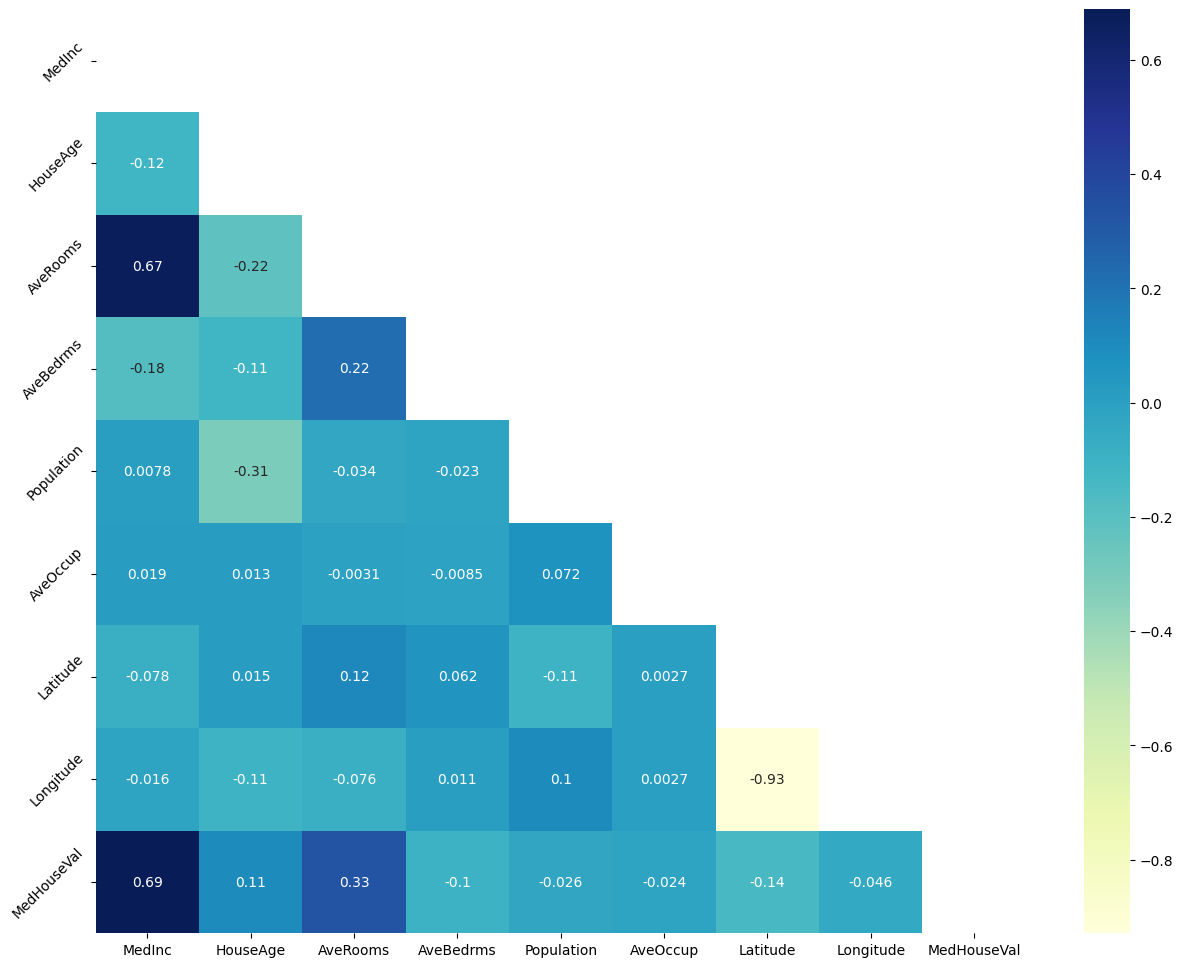

In [22]:
# Heatmap de la matrice de corrélation.

# Masque pour la partie supérieure de la matrice, qui est symétrique. 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Figure et plot
fig, ax = plt.subplots(figsize=(15,12)) 
dataplot = sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.yticks(rotation=45) 
plt.show()

### 3.1 Question

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelles variables sont fortement ($ |corr| > 0.2$) corrélées entre elles ? Est-ce que ces corrélations ont toutes un sens ? Développez.</p>

___



*Réponse:*
Il y a medHouseVal et medInc,avecBedrms et Medinc ,MedHouseVal et AveRooms, et AveBedrms et AveRooms


___

### 3.2 Régression

Exécutez les cellules ci-dessous.



In [23]:
# Version sklearn

def score_linear_regression(df: pd.DataFrame, *var: str, label: str = 'MedHouseVal', n_repetitions: int = 100):
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the boston dataset.
    var : Tuple of str
        Tuple with the variables to use as feature.
    label : str, default 'MEDV'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
    """
    scores = []
    labels = []
    predictions = []
    
    for _ in range(n_repetitions):
        regressor = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(df[list(var)], df[label], test_size=0.2)
        regressor.fit(X_train, y_train)
        labels.append(y_test)
        predictions.append(regressor.predict(X_test))
        scores.append(regressor.score(X_test, y_test))
    return np.mean(scores), labels, predictions

On choisit ensuite les groupes de variables non-corrélées entre elles que nous allons tester.


In [24]:

combos = [['Latitude', 'Longitude'], 
          ['AveRooms', 'Population', 'MedInc'],
          ['AveRooms', 'Population'], 
          ['AveRooms', 'MedInc'], 
          ['Population', 'MedInc']]

label = 'MedHouseVal'



Puis nous réalisons la régression linéaire multiple avec chaque groupe en utilisant notre fonction créée ci-dessus. 

In [25]:
for variables in combos:
    print(f'Model using {variables}')
    score, y_true, y_pred = score_linear_regression(df_normalized, *variables, label=label)
    print(f'Score={score}')
   

Model using ['Latitude', 'Longitude']


Score=0.22392702095915115
Model using ['AveRooms', 'Population', 'MedInc']
Score=0.4437386490626078
Model using ['AveRooms', 'Population']
Score=0.11069169214509701
Model using ['AveRooms', 'MedInc']
Score=0.44056544225032995
Model using ['Population', 'MedInc']
Score=0.42588159552385657


### Questions

(2 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Y a-t-il une différence de temps en comparaison avec les fonctions pour la régression linéaire simple que nous avons fait nous-même ? Commentez brièvement. <i>Vous pouvez considérer que la génération de graphiques dans nos fonctions ne prend pas de temps.</i></p>



*Réponse:* Oui il y a une différence de temps énorme 64 secondes pour l implémentation manuel et 0,7 secondes pour celle descore_linear_regression. Pour moi ses problème vienne du fait que :

Optimisation interne : La fonction LinearRegression de scikit-learn utilise des implémentations optimisées et des optimisations internes qui peuvent accélérer le processus d'entraînement par rapport à une implémentation manuelle.

Utilisation de bibliothèques optimisées : Scikit-learn utilise des bibliothèques comme NumPy et scip qui sont implémentées en langages bas-niveau (comme C ou Fortran) pour les calculs, ce qui peut rendre les opérations numériques plus rapides.

___

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quel groupe de variables permet de prédire au mieux la variable dépendante ? Quels résultats obtenez-vous ?</p>

*Réponse:*

Modèle avec ['Latitude', 'Longitude'] :

Score $R^2$ : 0.2552
Interprétation : Ce modèle explique environ 25.5% de la variance dans 'MedHouseVal' en utilisant uniquement les variables de localisation géographique.

Modèle avec ['AveRooms', 'Population', 'MedInc'] :

Score $R^2$ : 0.5254
Interprétation : Ce modèle performe mieux que les autres, expliquant environ 52.5% de la variance dans 'MedHouseVal' en utilisant les variables 'AveRooms', 'Population', et 'MedInc'.

Modèle avec ['AveRooms', 'Population'] :

Score $R^2$ : 0.0628
Interprétation : Ce modèle a un score $R^2$ relativement bas, indiquant une capacité limitée à expliquer la variance de 'MedHouseVal' en utilisant seulement 'AveRooms' et 'Population'.

Modèle avec ['AveRooms', 'MedInc'] :

Score $R^2$ : 0.5221
Interprétation : Ce modèle performe bien, expliquant environ 52.2% de la variance dans 'MedHouseVal' en utilisant 'AveRooms' et 'MedInc'.

Modèle avec ['Population', 'MedInc'] :

Score $R^2$ : 0.4847
Interprétation : Ce modèle explique environ 48.5% de la variance dans 'MedHouseVal' en utilisant 'Population' et 'MedInc'.
En conclusion, le modèle avec les variables 'AveRooms', 'Population', et 'MedInc' semble être le meilleur parmi ceux testés, avec le score $R^2$ le plus élevé. 


___

<div class="alert alert-block alert-info">
<b>Corrections 3: </b> Points obtenus: /5
</div>

Remarques: 

## Exercice 4: Clustering

(25 points)

Dans cette partie vous effectuerez ce que l'on appelle une Market Basket Analysis. Un centre commercial possède quelques données sur ses clients que vous retrouvez dans le dataset joint à ce labo ou [ici](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python). Ce dataset est un exemple très connu et vous trouverez la grande partie du code dont vous aurez besoin à partir de la page du dataset, sur [Kaggle](https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis). Pour ce TP nous allons partir du principe que vous prendrez votre code d'ailleurs donc vous n'avez **pas besoin de citer vos sources mais pour chaque partie vous devrez commenter le code que vous copiez (5 points) en y ajoutant quelques lignes de commentaires décrivant le but principal du code et les opérations majeures (pas besoin de décrire chaque ligne, vos commentaires doivent être utiles).**


---

### Partie 4.1: Analyse Exploratoire des Données

(10 points)

Faites une analyse exploratoire rapide des données. Vous pouvez ajouter des cellules si nécessaire. Une fois ceci fait, complétez les informations demandées ci-après. 

Faites aussi: 

- un scatterplot de chaque variable par rapport aux autres
- calculez le pourcentage homme-femme (affichez le avec un print)

In [26]:
# Lecture des données

df4 = pd.read_csv(r'./Mall_Customers.csv')
df4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
# Analyse exploratoire..
df4.shape



(200, 5)

In [28]:
# Analyse exploratoire..
df4.describe()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


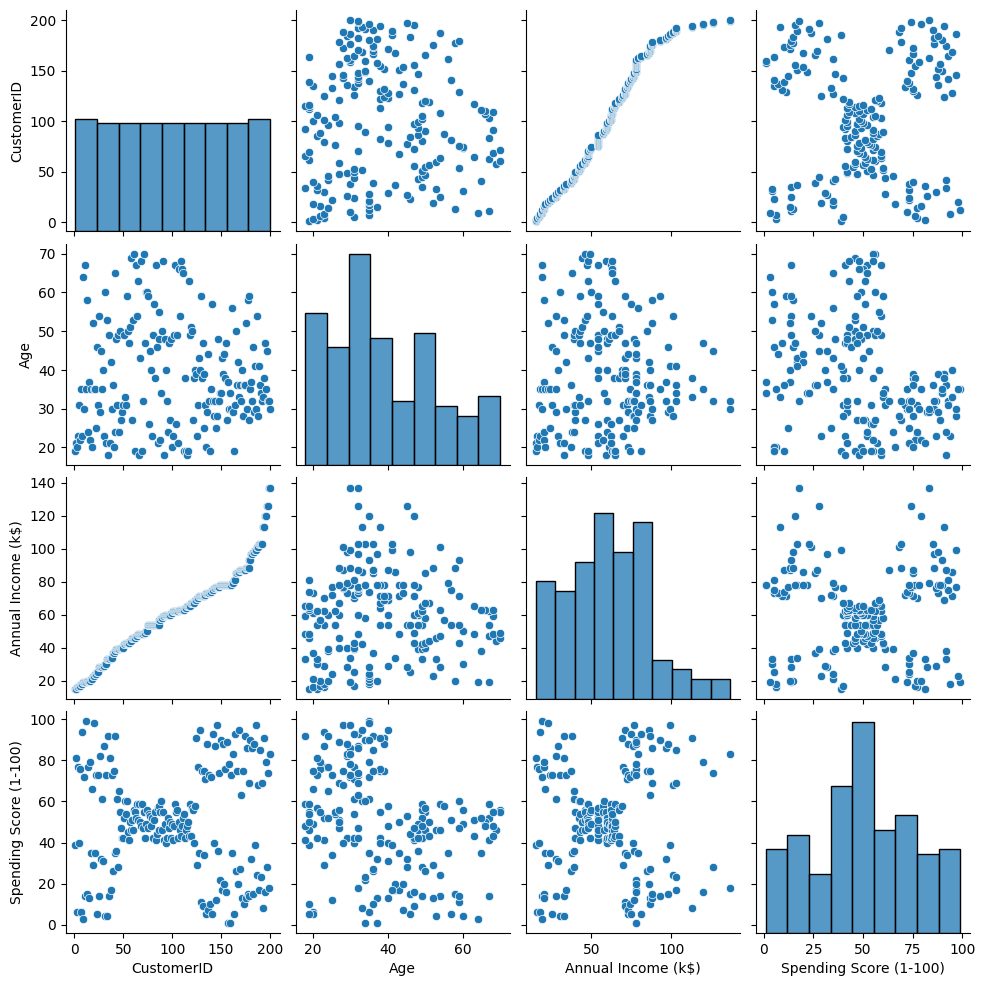

In [29]:
# Scatterplot (pairplot)
sns.pairplot(df4)
plt.show()




In [30]:
# Calcul du pourcentage d'hommes et de femmes dans le dataset
gender_percentage = df4['Gender'].value_counts(normalize=True) * 100
print("Pourcentage d'hommes et de femmes :\n", gender_percentage)


Pourcentage d'hommes et de femmes :
 Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Analyse exploratoire des données. Complétez les lignes avec les informations obtenues. Ne changez pas la disposition des informations.</p>

*Réponse:*

 

- Revenu moyen des clients: 60.56
- Revenu médian des clients: 61.5
- Revenu minimum: 15
- Revenu maximum: 137
- Nombre et type de variables: 5 variables de types: 

CustomerID                 int64

Gender                    object

Age                        int64

Annual Income (k$)         int64

Spending Score (1-100)     int64

dtype: object
- Nombre d'observations: 200

Détails : 
- Le revenu annuel est en ...(unité)
- Le spending score est ...(définition)



---

### Partie 4.2: Clustering
(10 points)


Maintenant que l’on connait bien les données, nous allons essayer de définir des groupes de clients afin de pouvoir les cibler avec une campagne de publicités agressives pour les forcer à acheter plus de choses dont ils n’ont pas besoin comme par exemple le tout dernier éplucheur sécurisé permettant de peler ses légumes sans se blesser, et ce pour seulement 8.99$ HT ! Pour cela, nous allons utiliser l'algorithme k-means en testant plusieurs k et ceci pour deux groupes de variables. 




Trouvez le bon nombre de clusters pour les groupes de variables suivants, en vous servant de la méthode du coude. 

- Spending Score VS Age
- Dépense VS revenu annuel 
- Revenu, Spending Score et Age 


Vous pouvez trouver le code et des explications [ici](https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis), vous serez donc principalement notés sur le bon usage et la bonne interprétation (**mise en page y compris**) de ce code et de ses résultats. 

Ajoutez les cellules nécessaire pour le code. **Faites un résumé et une analyse des résultats dans la cellule ci-après.** Pour cette analyse, rendez un résultat complet mais concis en donnant les informations et conclusions importantes. Vous ne devez ni révolutionner le marketing ni écrire un roman sur l'histoire de k-means au travers des siècles. 



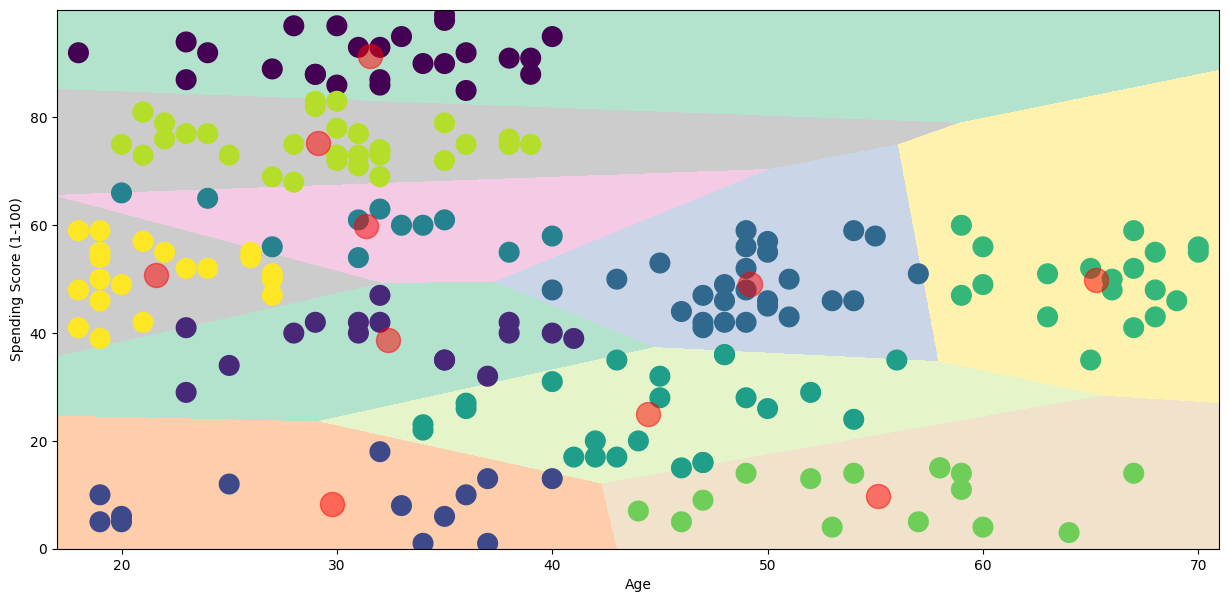

In [31]:
from sklearn.cluster import KMeans
 
X1 = df4[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    labels1 = algorithm.labels_
    centroids1 = algorithm.cluster_centers_
    
    h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df4 , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

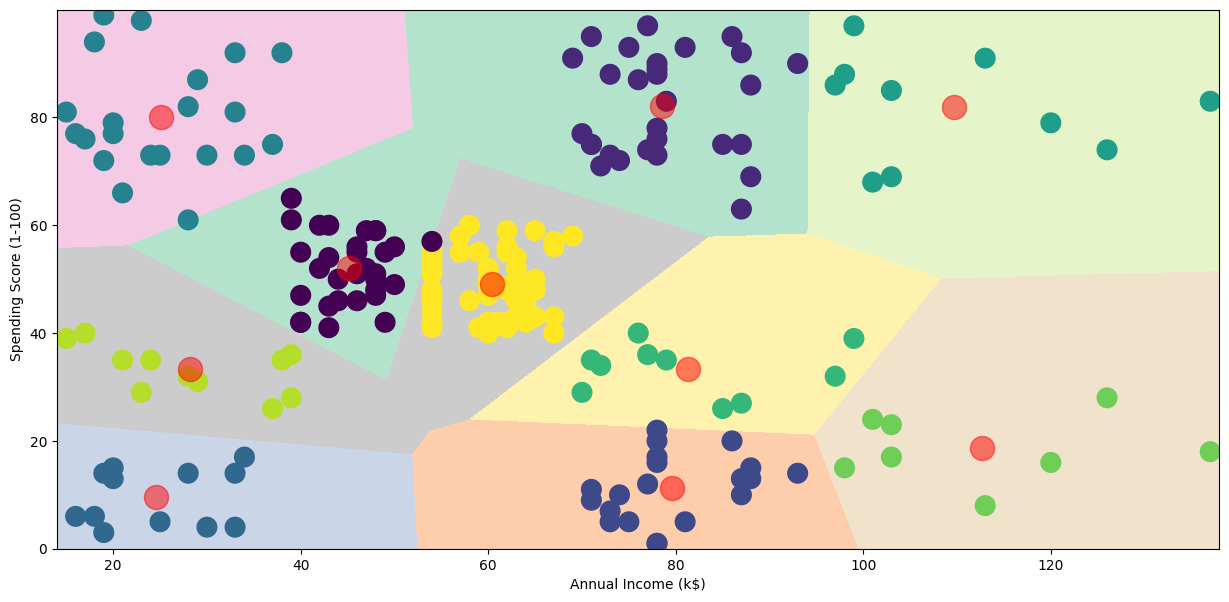

In [32]:
X2 = df4[['Annual Income (k$)', 'Spending Score (1-100)']].values
inertia = []

for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, random_state=111, algorithm='lloyd')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1, figsize=(15, 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df4, c=labels2, s=200)
plt.scatter(x=centroids2[:, 0], y=centroids2[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()


In [42]:
import plotly as py
import plotly.graph_objs as go
X3 = df4[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
   
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
    algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

df4['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df4['Age'],
    y= df4['Spending Score (1-100)'],
    z= df4['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df4['label3'], 
        size= 20,
        line=dict(
            color= df4['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)

py.offline.plot(fig, auto_open=True)

'temp-plot.html'

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>R </b></font>Résumé et interprétation des résultats.</p>

*Réponse:*
Block 1:

1. Dans le premier bloc, nous avons appliqué l'algorithme K-means pour former des clusters en fonction de l'âge et du Spending Score.
2. Les résultats montrent que si les personne sont jeunes il y a plus de disparité dans les dépences. Cela va du minimum au maximum. Puis Les gens en veillissant vont ce mettre a moins depenser car entre 35 ans et 70 ans les données maximumes ne vont pas au dessus 50 en score de depence
3. Les clusters ont été définis en fonction des moyenne des groupes que forment les ensembles de points 
4. Ce qu'on peut deduire c est qu'avec l'age les gens devienent plus précotionneux avec leur argent


Block 2: 

1. Dans le deuxième bloc, nous avons appliqué K-means pour former des clusters en fonction du revenu annuel et du Spending Score.
2. On peut y voir ici quelques choses d'étranges celon moi : Une partie des personnes qui ont le moins de revenu font parti des personnes qui depense le plus. Sinon les personnes sont entre 40'000 et 60'000 de revenu depense a hauteur de leur revenu.
3. Les clusters ont été définis en fonction des moyenne des groupes que forment les ensembles de points 
4. Ce qu'on peut deduire c'est que certaine personne qui ont un faible revenu depense énormément 


Block 3:


1. Dans le troisième bloc, nous avons utilisé K-means pour former des clusters en utilisant trois variables: Age, Revenu Annuel, Spending Score.
2. Les résultats tridimensionnels montrent ce que nous avons illuster au dessus plus les personne viellissent moins elle dépense (a part pour certain riche) et certaine personne dépense plus que ce que leur permentent leur revenu
3. Les clusters ont été définis en fonction des moyenne des groupes que forment les ensembles de points 



---

<div class="alert alert-block alert-info">
<b>Corrections 4: </b> Points obtenus: /25
</div>

Remarques: 


---

(Optionnel) Si vous faites ce labo avant les fêtes, exécutez la cellule ci-dessous. 

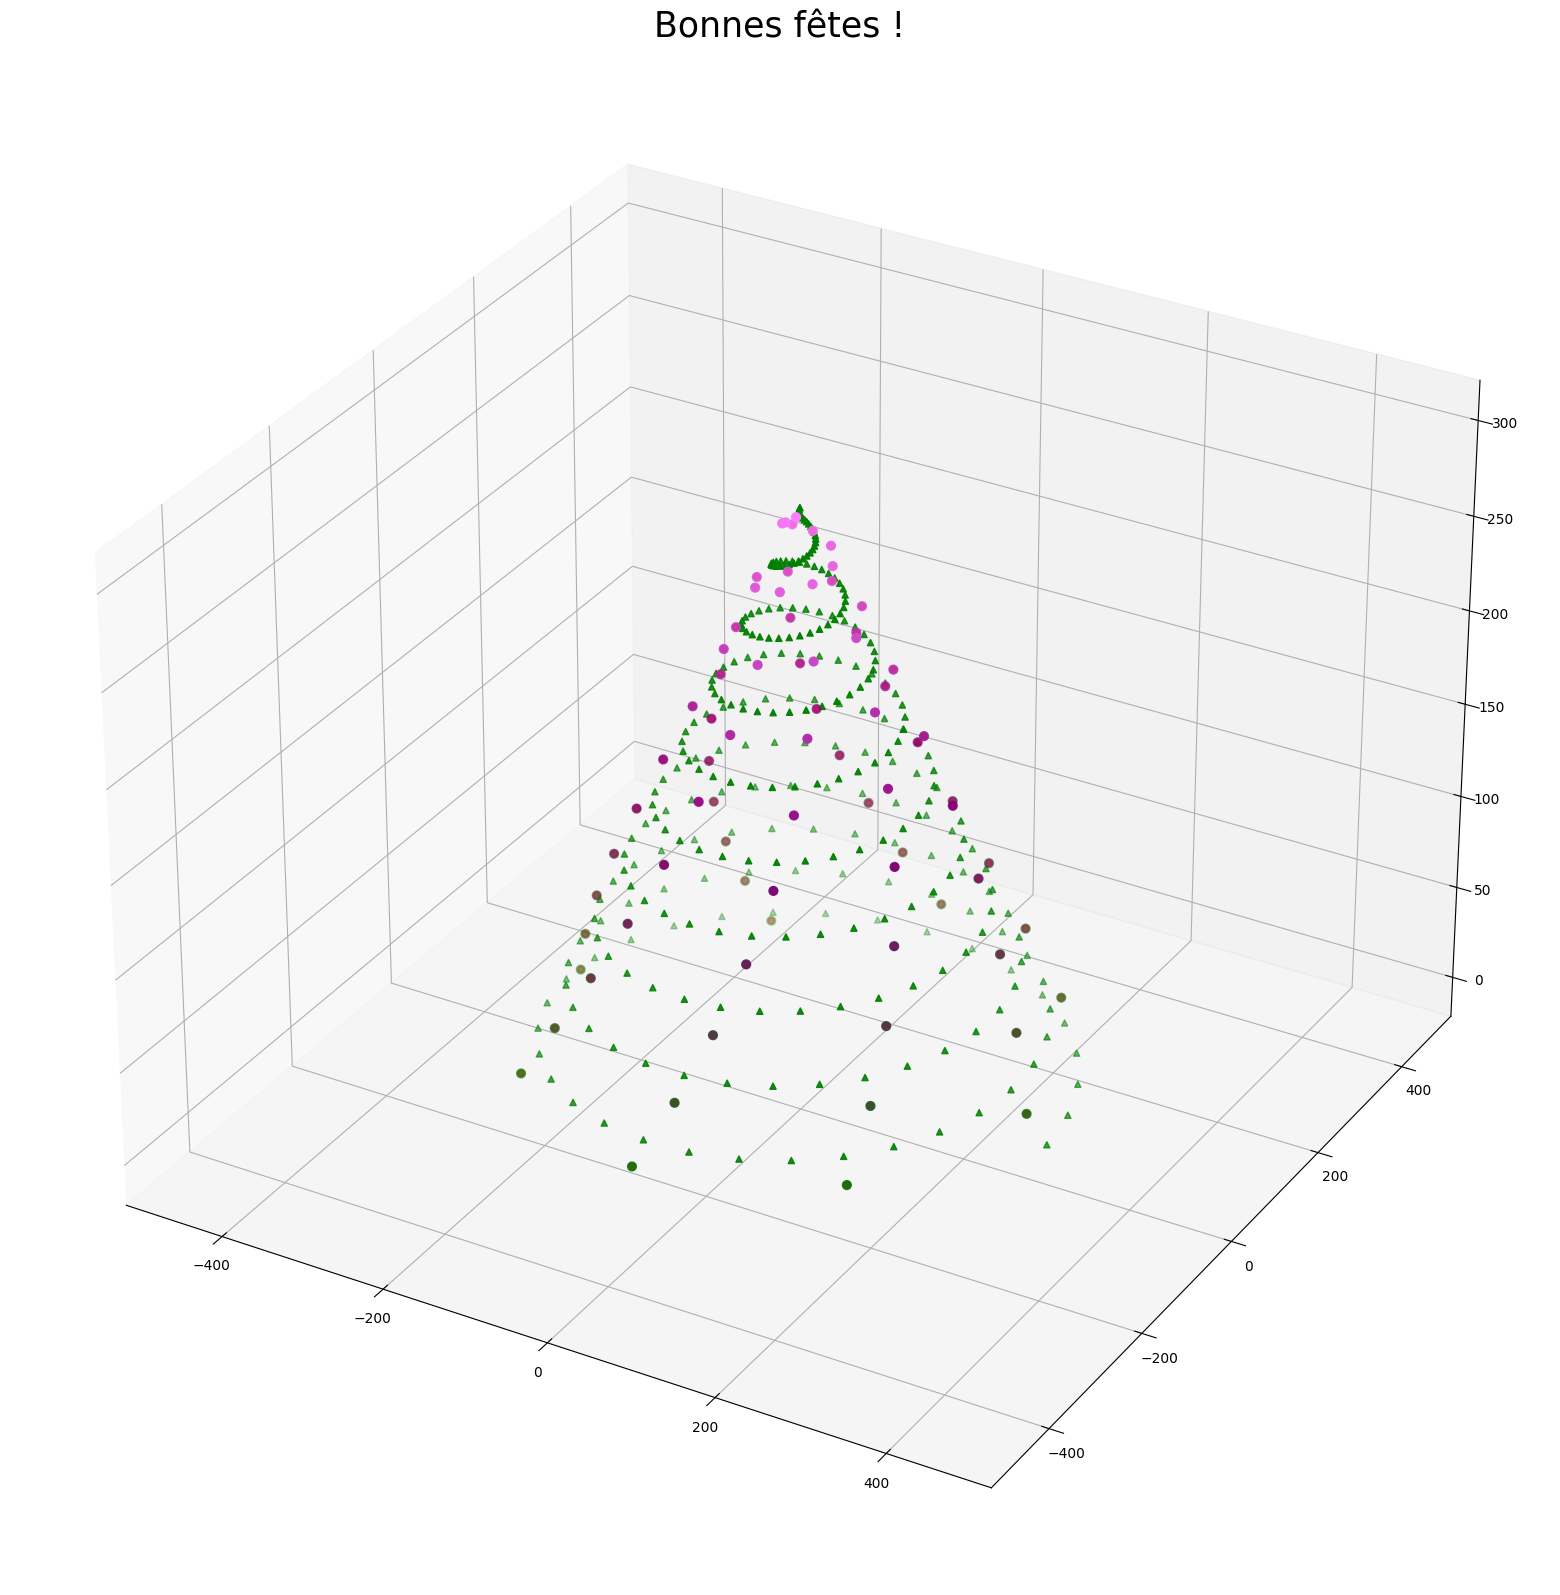

In [34]:
# Code goulûment copié de: 
# https://medium.com/analytics-vidhya/how-to-draw-a-3d-christmas-tree-with-matplotlib-aabb9bc27864

import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection="3d")

k=300
Z = [i for i in range(k)]
X = [math.cos(i/5)*(k-i) for i in range(k)]
Y = [math.sin(i/5)*(k-i) for i in range(k)]
ax.scatter(X,Y,Z, c="green", marker="^")
k=300
step = 4
Z = [i for i in range(1,k,step)]
X = [math.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
Y = [math.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c="red", marker="o")

c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c=c, marker="o",s=40)


plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("Bonnes fêtes !", {'fontsize': 25})
plt.show()

